# Implementation 3 of the Image Classfication Model

In [2]:
# Import the necessary libraries:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential# used for the model

### Dataset import:

In [3]:
# import the data from kaggle:
import opendatasets as od
import pandas

#download the data using a kaggle api:
dataset_path = "./large-image-dataset"#path to the data

### Load in the dataset:

In [4]:
#Loading the Data in a faster and more efficient manner:
files = os.listdir(dataset_path)#gather the path:
#paths to the files
folder_path = os.path.join(dataset_path)#path to the images
#tf.keras.utils.image_dataset_from_directory??
data  = tf.keras.utils.image_dataset_from_directory(folder_path,image_size=(180,180))
print(type(data))

Found 19602 files belonging to 81 classes.
<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>


### Preprocessing the data:

In [5]:
data = data.map(lambda x,y: (x/255, y))# tf function map to rescale the images
print(type(data))

<class 'tensorflow.python.data.ops.map_op._MapDataset'>


### Visualising the data:

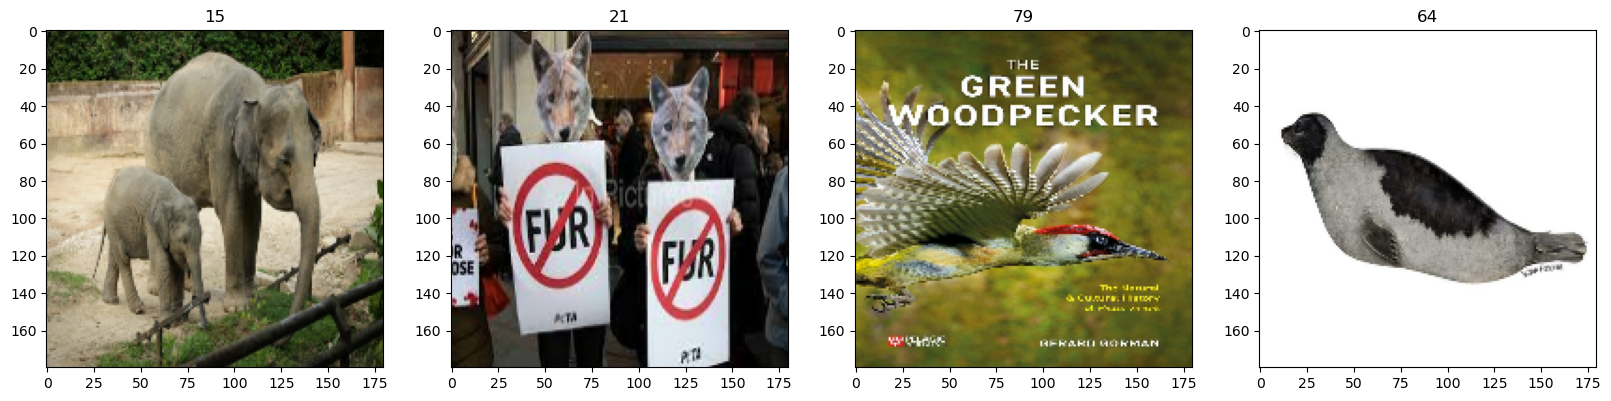

In [6]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
# batch[0].shape
#visualise the data:
fig, axis = plt.subplots(ncols=4, figsize=(20, 20))
batch_images = batch[0][:4]
batch_labels = batch[1]

for idx in range(4):
    axis[idx].imshow(batch_images[idx])
    axis[idx].title.set_text(batch_labels[idx])

### Split up the data:

In [7]:
print(batch[0].max())
print(batch[0].min())

#Split the data:
print("Length: ",len(data))
#Size for each batch: (70% train, 15% validation, 15% test)
train_size = round(len(data) * 0.7)
validation_size = round(len(data)*0.2)
test_size = len(data) - train_size - validation_size
print(train_size,validation_size,test_size)

1.0
0.0
Length:  613
429 123 61


In [8]:
#Alocate the Batches to the data:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(validation_size)
test_data = data.skip(train_size+validation_size).take(test_size)

print(len(train_data))

429


In [9]:
training_data_iterator = train_data.as_numpy_iterator()
batch = training_data_iterator.next()

### Data augmentation:

In [10]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
])

# Function to apply data augmentation to each batch
def apply_data_augmentation(images, labels):
    # Unpack the batch into images and labels

    augmented_images = data_augmentation(images)

    # Return a new dataset
    augmented_batch = (augmented_images, labels)
    
    return augmented_batch

In [11]:
train_data_augmented = train_data.map(apply_data_augmentation)

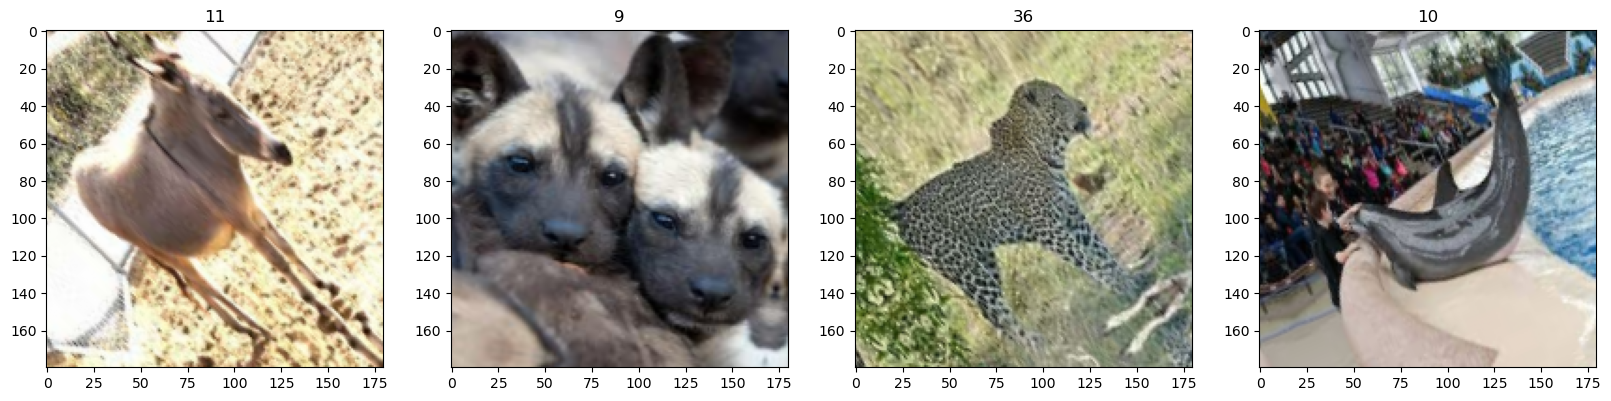

In [12]:
training_batch = train_data_augmented.as_numpy_iterator().next()

#visualise the data:
fig, axis = plt.subplots(ncols=4, figsize=(20, 20))
batch_images = training_batch[0][:4]
batch_labels = training_batch[1]

for idx in range(4):
    axis[idx].imshow(batch_images[idx])
    axis[idx].title.set_text(batch_labels[idx])

In [13]:
train_data = train_data.concatenate(train_data_augmented)

len(train_data)

858

### Training set data distribution:

In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
train_class_counts = Counter()

for _, labels in train_data:
    print(train_class_counts)
    train_class_counts.update(labels.numpy())
    
print('finished')

Counter()
Counter({63: 2, 8: 2, 66: 2, 35: 1, 74: 1, 53: 1, 71: 1, 46: 1, 58: 1, 48: 1, 43: 1, 52: 1, 49: 1, 80: 1, 38: 1, 22: 1, 29: 1, 56: 1, 57: 1, 60: 1, 72: 1, 51: 1, 31: 1, 11: 1, 4: 1, 20: 1, 69: 1, 67: 1, 47: 1})
Counter({63: 5, 66: 3, 50: 3, 71: 2, 8: 2, 52: 2, 49: 2, 56: 2, 31: 2, 20: 2, 18: 2, 24: 2, 14: 2, 33: 2, 35: 1, 74: 1, 53: 1, 46: 1, 58: 1, 48: 1, 43: 1, 80: 1, 38: 1, 22: 1, 29: 1, 57: 1, 60: 1, 72: 1, 51: 1, 11: 1, 4: 1, 69: 1, 67: 1, 47: 1, 19: 1, 15: 1, 45: 1, 42: 1, 76: 1, 12: 1, 59: 1, 26: 1, 75: 1, 62: 1, 25: 1})
Counter({63: 6, 50: 5, 74: 3, 71: 3, 49: 3, 22: 3, 66: 3, 31: 3, 18: 3, 33: 3, 59: 3, 8: 2, 52: 2, 80: 2, 56: 2, 57: 2, 20: 2, 24: 2, 14: 2, 25: 2, 2: 2, 73: 2, 35: 1, 53: 1, 46: 1, 58: 1, 48: 1, 43: 1, 38: 1, 29: 1, 60: 1, 72: 1, 51: 1, 11: 1, 4: 1, 69: 1, 67: 1, 47: 1, 19: 1, 15: 1, 45: 1, 42: 1, 76: 1, 12: 1, 26: 1, 75: 1, 62: 1, 79: 1, 17: 1, 44: 1, 70: 1, 40: 1, 5: 1, 64: 1, 10: 1, 23: 1, 27: 1, 78: 1})
Counter({63: 6, 50: 5, 74: 4, 66: 4, 33: 4, 

Counter({67: 15, 43: 13, 25: 13, 79: 13, 2: 13, 66: 12, 50: 12, 33: 12, 59: 12, 80: 11, 11: 11, 75: 11, 17: 11, 73: 11, 63: 10, 62: 10, 74: 9, 46: 9, 49: 9, 31: 9, 76: 9, 78: 9, 39: 9, 41: 9, 38: 8, 4: 8, 69: 8, 24: 8, 9: 8, 21: 8, 28: 8, 35: 7, 71: 7, 22: 7, 29: 7, 14: 7, 45: 7, 26: 7, 70: 7, 40: 7, 0: 7, 36: 7, 34: 7, 16: 7, 8: 6, 52: 6, 60: 6, 47: 6, 42: 6, 7: 6, 65: 6, 54: 6, 53: 5, 58: 5, 48: 5, 56: 5, 72: 5, 20: 5, 18: 5, 44: 5, 5: 5, 10: 5, 61: 5, 30: 5, 37: 5, 6: 5, 57: 4, 51: 4, 12: 4, 23: 4, 1: 4, 32: 4, 77: 4, 64: 3, 27: 3, 55: 3, 13: 3, 68: 3, 19: 2, 15: 2, 3: 2})
Counter({67: 15, 43: 14, 59: 14, 25: 14, 79: 13, 2: 13, 73: 13, 66: 12, 11: 12, 50: 12, 33: 12, 17: 12, 80: 11, 76: 11, 75: 11, 63: 10, 74: 10, 62: 10, 46: 9, 49: 9, 38: 9, 31: 9, 69: 9, 24: 9, 78: 9, 39: 9, 41: 9, 35: 8, 48: 8, 29: 8, 4: 8, 70: 8, 40: 8, 36: 8, 9: 8, 21: 8, 28: 8, 71: 7, 22: 7, 56: 7, 60: 7, 14: 7, 45: 7, 26: 7, 0: 7, 34: 7, 16: 7, 8: 6, 52: 6, 47: 6, 42: 6, 7: 6, 61: 6, 65: 6, 54: 6, 53: 5, 58: 

Counter({73: 24, 59: 23, 67: 20, 79: 20, 2: 20, 21: 20, 11: 19, 62: 19, 74: 18, 43: 18, 80: 18, 9: 18, 53: 17, 66: 17, 57: 17, 75: 17, 25: 17, 17: 17, 49: 16, 50: 16, 70: 16, 28: 16, 63: 15, 4: 15, 69: 15, 45: 15, 33: 15, 16: 15, 56: 14, 24: 14, 78: 14, 29: 13, 20: 13, 76: 13, 40: 13, 10: 13, 23: 13, 0: 13, 1: 13, 46: 12, 8: 12, 22: 12, 31: 12, 47: 12, 14: 12, 39: 12, 7: 12, 36: 12, 34: 12, 54: 12, 35: 11, 71: 11, 48: 11, 52: 11, 38: 11, 60: 11, 44: 11, 64: 11, 27: 11, 61: 11, 42: 10, 26: 10, 5: 10, 41: 10, 65: 10, 32: 10, 58: 9, 72: 9, 12: 9, 30: 9, 37: 9, 6: 9, 18: 8, 19: 8, 55: 8, 13: 7, 77: 7, 51: 6, 15: 6, 68: 6, 3: 5})
Counter({73: 26, 59: 23, 67: 20, 79: 20, 2: 20, 21: 20, 53: 19, 80: 19, 11: 19, 62: 19, 25: 19, 9: 19, 74: 18, 43: 18, 75: 18, 17: 18, 49: 17, 66: 17, 57: 17, 63: 16, 4: 16, 50: 16, 70: 16, 78: 16, 16: 16, 28: 16, 56: 15, 69: 15, 45: 15, 33: 15, 24: 14, 76: 14, 40: 14, 29: 13, 31: 13, 20: 13, 10: 13, 23: 13, 0: 13, 7: 13, 1: 13, 54: 13, 46: 12, 8: 12, 48: 12, 22: 1

Counter({73: 31, 79: 28, 21: 27, 66: 26, 67: 26, 59: 26, 2: 26, 53: 25, 50: 24, 16: 24, 80: 23, 57: 23, 62: 23, 17: 23, 28: 23, 74: 22, 31: 22, 11: 22, 4: 22, 75: 22, 9: 22, 43: 21, 56: 21, 33: 21, 25: 21, 78: 21, 24: 20, 45: 20, 1: 20, 63: 19, 60: 19, 20: 19, 14: 19, 40: 19, 37: 19, 49: 18, 29: 18, 70: 18, 41: 18, 46: 17, 0: 17, 7: 17, 34: 17, 54: 17, 35: 16, 48: 16, 38: 16, 69: 16, 47: 16, 42: 16, 76: 16, 44: 16, 39: 16, 36: 16, 8: 15, 22: 15, 19: 15, 12: 15, 26: 15, 5: 15, 10: 15, 61: 15, 30: 15, 68: 15, 71: 14, 58: 14, 15: 14, 23: 14, 27: 14, 55: 14, 65: 14, 6: 14, 3: 14, 52: 13, 18: 13, 72: 12, 64: 12, 13: 11, 32: 11, 77: 10, 51: 8})
Counter({73: 32, 79: 28, 21: 28, 66: 26, 67: 26, 59: 26, 2: 26, 53: 25, 50: 25, 16: 25, 74: 24, 80: 24, 57: 24, 11: 24, 4: 23, 75: 23, 62: 23, 17: 23, 28: 23, 31: 22, 33: 22, 25: 22, 9: 22, 43: 21, 56: 21, 78: 21, 49: 20, 24: 20, 45: 20, 1: 20, 63: 19, 60: 19, 20: 19, 14: 19, 40: 19, 37: 19, 46: 18, 29: 18, 70: 18, 41: 18, 7: 18, 35: 17, 44: 17, 0: 17

Counter({79: 37, 73: 36, 11: 34, 21: 34, 66: 33, 20: 32, 2: 32, 53: 31, 33: 31, 16: 31, 57: 30, 31: 30, 67: 30, 74: 29, 56: 29, 80: 28, 60: 28, 50: 28, 59: 28, 36: 28, 43: 27, 38: 27, 4: 27, 25: 27, 78: 27, 63: 26, 49: 26, 62: 26, 10: 26, 28: 26, 46: 25, 69: 25, 14: 25, 75: 25, 41: 25, 35: 24, 48: 24, 22: 24, 29: 24, 26: 24, 17: 24, 70: 24, 40: 24, 61: 24, 1: 24, 34: 24, 54: 24, 37: 24, 12: 23, 44: 23, 7: 23, 9: 23, 24: 22, 45: 22, 42: 22, 76: 22, 0: 22, 65: 22, 32: 22, 71: 21, 8: 21, 72: 21, 47: 21, 23: 21, 68: 21, 6: 21, 3: 21, 58: 20, 19: 20, 15: 20, 30: 20, 5: 19, 39: 19, 52: 18, 27: 18, 51: 17, 77: 17, 13: 16, 18: 15, 64: 15, 55: 15})
Counter({79: 37, 73: 36, 21: 35, 11: 34, 66: 33, 20: 32, 2: 32, 16: 32, 53: 31, 57: 31, 31: 31, 67: 31, 33: 31, 80: 30, 36: 30, 74: 29, 43: 29, 56: 29, 60: 28, 50: 28, 59: 28, 38: 27, 4: 27, 25: 27, 78: 27, 63: 26, 49: 26, 22: 26, 69: 26, 14: 26, 62: 26, 17: 26, 10: 26, 28: 26, 46: 25, 75: 25, 70: 25, 41: 25, 61: 25, 34: 25, 35: 24, 48: 24, 29: 24, 2

Counter({79: 44, 11: 42, 73: 41, 67: 38, 33: 38, 56: 37, 66: 37, 21: 37, 31: 36, 36: 36, 16: 36, 74: 35, 20: 35, 43: 34, 78: 34, 53: 33, 48: 33, 22: 33, 57: 33, 50: 33, 59: 33, 2: 33, 80: 32, 69: 32, 14: 32, 62: 32, 17: 32, 10: 32, 34: 32, 28: 32, 54: 32, 63: 31, 49: 31, 38: 31, 40: 31, 32: 31, 37: 31, 6: 31, 8: 30, 29: 30, 4: 30, 24: 30, 25: 30, 70: 30, 35: 29, 46: 29, 75: 29, 44: 29, 23: 29, 61: 29, 9: 29, 60: 28, 72: 28, 15: 28, 41: 28, 0: 28, 7: 28, 65: 28, 30: 28, 71: 27, 19: 27, 45: 27, 42: 27, 12: 27, 26: 27, 1: 27, 3: 27, 51: 26, 68: 26, 52: 25, 5: 25, 58: 24, 47: 24, 55: 24, 39: 23, 76: 22, 77: 22, 27: 21, 18: 18, 64: 17, 13: 16})
Counter({79: 44, 11: 42, 73: 41, 67: 39, 33: 38, 21: 38, 56: 37, 66: 37, 16: 37, 74: 36, 31: 36, 36: 36, 57: 35, 20: 35, 78: 35, 48: 34, 43: 34, 62: 34, 40: 34, 53: 33, 22: 33, 50: 33, 14: 33, 59: 33, 17: 33, 2: 33, 49: 32, 80: 32, 69: 32, 10: 32, 34: 32, 28: 32, 54: 32, 63: 31, 38: 31, 4: 31, 24: 31, 70: 31, 32: 31, 37: 31, 6: 31, 35: 30, 8: 30, 29:

Counter({79: 52, 11: 48, 67: 45, 74: 43, 56: 43, 20: 42, 75: 42, 21: 42, 28: 42, 66: 41, 73: 41, 69: 40, 33: 40, 78: 40, 36: 40, 16: 40, 35: 39, 22: 39, 57: 39, 31: 39, 50: 39, 62: 39, 40: 39, 32: 39, 14: 38, 2: 38, 53: 37, 43: 37, 4: 37, 17: 37, 34: 37, 48: 36, 49: 36, 80: 36, 24: 36, 70: 36, 10: 36, 9: 36, 54: 36, 8: 35, 15: 35, 45: 35, 59: 35, 26: 35, 41: 35, 37: 35, 6: 35, 29: 34, 51: 34, 23: 34, 7: 34, 63: 33, 46: 33, 38: 33, 19: 33, 65: 33, 3: 33, 72: 32, 47: 32, 42: 32, 1: 32, 30: 32, 58: 31, 60: 31, 25: 31, 44: 31, 68: 31, 71: 30, 52: 30, 0: 30, 61: 30, 12: 29, 55: 29, 77: 28, 5: 26, 27: 26, 76: 25, 64: 25, 39: 25, 18: 22, 13: 22})
Counter({79: 52, 11: 48, 67: 47, 74: 44, 56: 43, 28: 43, 20: 42, 33: 42, 75: 42, 21: 42, 66: 41, 57: 41, 73: 41, 36: 41, 69: 40, 62: 40, 78: 40, 16: 40, 32: 40, 35: 39, 43: 39, 22: 39, 31: 39, 50: 39, 14: 39, 40: 39, 34: 39, 2: 38, 53: 37, 4: 37, 59: 37, 17: 37, 70: 37, 9: 37, 54: 37, 48: 36, 49: 36, 80: 36, 24: 36, 15: 36, 45: 36, 10: 36, 37: 36, 8:

Counter({79: 53, 21: 53, 11: 52, 67: 50, 32: 50, 74: 49, 28: 49, 56: 47, 20: 47, 33: 47, 62: 47, 16: 47, 14: 46, 75: 46, 43: 45, 22: 45, 66: 45, 57: 45, 69: 45, 4: 44, 2: 44, 73: 44, 36: 44, 37: 44, 35: 43, 50: 43, 54: 43, 80: 42, 29: 42, 31: 42, 17: 42, 78: 42, 65: 42, 53: 41, 8: 41, 24: 41, 15: 41, 59: 41, 26: 41, 40: 41, 34: 41, 46: 40, 48: 40, 45: 40, 10: 40, 41: 40, 49: 39, 44: 39, 9: 39, 6: 39, 38: 38, 19: 38, 25: 38, 70: 38, 30: 38, 68: 38, 52: 37, 72: 37, 47: 37, 42: 37, 23: 37, 0: 37, 55: 37, 7: 37, 63: 36, 71: 35, 60: 35, 51: 35, 12: 35, 1: 35, 3: 35, 58: 34, 77: 34, 64: 31, 61: 31, 5: 30, 39: 30, 27: 29, 18: 28, 76: 28, 13: 26})
Counter({21: 54, 11: 53, 79: 53, 32: 51, 67: 50, 74: 49, 20: 49, 33: 49, 16: 49, 28: 49, 56: 48, 62: 47, 43: 46, 22: 46, 14: 46, 75: 46, 66: 45, 57: 45, 69: 45, 4: 44, 2: 44, 73: 44, 36: 44, 37: 44, 35: 43, 80: 43, 50: 43, 24: 43, 17: 43, 40: 43, 54: 43, 29: 42, 31: 42, 59: 42, 78: 42, 65: 42, 53: 41, 8: 41, 48: 41, 15: 41, 26: 41, 34: 41, 46: 40, 49

Counter({21: 63, 11: 61, 28: 59, 32: 58, 79: 57, 74: 56, 56: 56, 33: 56, 67: 55, 80: 54, 57: 54, 14: 53, 22: 52, 20: 52, 15: 52, 62: 52, 78: 52, 16: 52, 69: 51, 24: 51, 75: 51, 53: 50, 66: 50, 50: 50, 43: 49, 31: 49, 4: 49, 40: 49, 2: 49, 36: 49, 35: 48, 29: 48, 26: 48, 17: 48, 73: 48, 54: 48, 3: 48, 45: 47, 59: 47, 48: 46, 23: 46, 41: 46, 34: 46, 8: 45, 10: 45, 65: 45, 68: 45, 37: 45, 63: 44, 19: 44, 70: 44, 7: 44, 30: 44, 6: 44, 71: 43, 49: 43, 38: 43, 0: 43, 55: 43, 1: 43, 60: 42, 76: 42, 44: 42, 9: 42, 46: 41, 52: 41, 72: 41, 42: 41, 25: 41, 27: 41, 47: 40, 12: 40, 51: 39, 39: 39, 5: 38, 77: 38, 64: 37, 58: 35, 61: 35, 13: 35, 18: 34})
Counter({21: 63, 11: 61, 28: 59, 32: 58, 56: 57, 79: 57, 74: 56, 67: 56, 33: 56, 57: 55, 80: 54, 15: 54, 22: 53, 20: 53, 14: 53, 78: 53, 16: 53, 69: 52, 62: 52, 24: 51, 75: 51, 36: 51, 53: 50, 66: 50, 4: 50, 50: 50, 40: 50, 35: 49, 43: 49, 31: 49, 2: 49, 73: 49, 3: 49, 29: 48, 45: 48, 59: 48, 26: 48, 17: 48, 54: 48, 23: 47, 41: 47, 48: 46, 34: 46, 65

Counter({21: 69, 79: 65, 28: 64, 11: 63, 32: 62, 80: 61, 56: 60, 33: 60, 36: 60, 66: 59, 15: 59, 74: 58, 22: 58, 57: 58, 69: 57, 67: 57, 53: 56, 29: 56, 50: 56, 78: 56, 16: 56, 43: 55, 4: 55, 20: 55, 59: 55, 54: 55, 24: 54, 14: 54, 17: 54, 40: 54, 41: 54, 65: 54, 3: 54, 35: 53, 31: 53, 62: 53, 2: 53, 73: 53, 23: 53, 45: 52, 75: 52, 30: 52, 63: 50, 8: 50, 42: 50, 26: 50, 44: 50, 70: 50, 7: 50, 34: 50, 68: 50, 49: 49, 60: 49, 76: 49, 10: 49, 37: 49, 46: 48, 48: 48, 19: 48, 0: 48, 55: 48, 71: 47, 72: 47, 47: 47, 12: 47, 25: 47, 39: 47, 1: 47, 52: 46, 38: 46, 77: 45, 6: 45, 27: 43, 9: 43, 51: 42, 18: 42, 5: 42, 64: 41, 61: 39, 13: 39, 58: 38})
Counter({21: 69, 79: 65, 28: 64, 11: 63, 80: 62, 32: 62, 56: 61, 33: 60, 36: 60, 22: 59, 66: 59, 15: 59, 74: 58, 29: 58, 57: 58, 69: 57, 67: 57, 53: 56, 43: 56, 4: 56, 50: 56, 59: 56, 17: 56, 78: 56, 16: 56, 54: 56, 20: 55, 40: 55, 35: 54, 31: 54, 24: 54, 14: 54, 2: 54, 23: 54, 41: 54, 65: 54, 30: 54, 3: 54, 62: 53, 73: 53, 45: 52, 75: 52, 63: 51, 8:

Counter({21: 77, 80: 69, 79: 69, 66: 68, 11: 68, 67: 68, 28: 67, 41: 66, 32: 66, 56: 65, 22: 64, 15: 64, 33: 64, 35: 63, 74: 62, 29: 62, 17: 62, 36: 62, 57: 61, 69: 61, 45: 61, 40: 61, 54: 61, 53: 60, 4: 60, 76: 60, 78: 60, 20: 59, 59: 59, 73: 59, 3: 59, 8: 58, 48: 58, 43: 58, 50: 58, 24: 58, 16: 58, 19: 57, 75: 57, 70: 57, 34: 57, 49: 56, 60: 56, 31: 56, 14: 56, 65: 56, 30: 56, 63: 55, 46: 55, 72: 55, 62: 55, 2: 55, 23: 55, 7: 55, 68: 55, 42: 54, 55: 54, 37: 54, 71: 53, 38: 53, 10: 53, 1: 53, 47: 52, 44: 52, 12: 51, 26: 51, 39: 51, 25: 50, 0: 50, 18: 49, 77: 49, 6: 49, 52: 48, 51: 47, 27: 47, 61: 47, 5: 46, 58: 45, 9: 45, 64: 44, 13: 42})
Counter({21: 77, 80: 70, 66: 69, 11: 69, 79: 69, 67: 68, 41: 67, 28: 67, 56: 66, 32: 66, 22: 65, 15: 64, 33: 64, 35: 63, 40: 63, 54: 63, 74: 62, 29: 62, 17: 62, 36: 62, 57: 61, 69: 61, 45: 61, 53: 60, 4: 60, 76: 60, 78: 60, 16: 60, 20: 59, 50: 59, 59: 59, 70: 59, 73: 59, 3: 59, 8: 58, 48: 58, 43: 58, 24: 58, 34: 58, 49: 57, 19: 57, 14: 57, 75: 57, 46

Counter({21: 82, 11: 75, 79: 75, 80: 74, 32: 73, 74: 72, 53: 72, 66: 72, 28: 72, 33: 71, 41: 71, 56: 70, 67: 70, 22: 69, 17: 69, 40: 69, 29: 68, 69: 68, 15: 68, 54: 68, 48: 66, 43: 66, 50: 66, 59: 66, 35: 65, 72: 65, 70: 65, 73: 65, 36: 65, 68: 65, 4: 64, 24: 64, 76: 64, 34: 64, 3: 64, 57: 63, 60: 63, 14: 63, 45: 63, 78: 63, 16: 63, 19: 62, 8: 61, 49: 61, 20: 61, 65: 61, 37: 61, 71: 60, 31: 60, 42: 60, 26: 60, 75: 60, 62: 60, 2: 60, 23: 60, 7: 60, 44: 59, 30: 59, 63: 58, 46: 58, 0: 58, 55: 58, 1: 58, 52: 57, 38: 57, 47: 57, 10: 57, 12: 56, 39: 56, 18: 54, 25: 54, 27: 54, 9: 53, 77: 53, 6: 53, 5: 52, 61: 52, 58: 51, 64: 51, 51: 49, 13: 45})
Counter({21: 82, 11: 76, 79: 75, 80: 74, 53: 73, 32: 73, 28: 73, 74: 72, 66: 72, 33: 72, 41: 72, 56: 70, 67: 70, 22: 69, 17: 69, 40: 69, 29: 68, 69: 68, 15: 68, 54: 68, 48: 66, 43: 66, 50: 66, 59: 66, 70: 66, 35: 65, 60: 65, 72: 65, 4: 65, 73: 65, 36: 65, 34: 65, 68: 65, 57: 64, 24: 64, 45: 64, 76: 64, 16: 64, 3: 64, 8: 63, 19: 63, 14: 63, 78: 63, 20

Counter({21: 85, 11: 80, 79: 80, 80: 79, 69: 79, 53: 78, 33: 78, 32: 78, 66: 77, 73: 77, 28: 77, 40: 76, 67: 75, 41: 75, 74: 74, 29: 74, 17: 74, 56: 73, 50: 73, 15: 73, 34: 73, 54: 73, 57: 72, 60: 72, 45: 72, 59: 72, 78: 72, 48: 71, 22: 71, 24: 71, 70: 71, 35: 70, 20: 70, 16: 69, 43: 68, 4: 68, 14: 68, 23: 68, 36: 68, 68: 68, 31: 67, 76: 67, 10: 67, 0: 67, 3: 67, 72: 66, 47: 66, 19: 66, 37: 66, 71: 65, 8: 65, 49: 65, 62: 65, 44: 65, 55: 65, 7: 65, 65: 65, 42: 64, 26: 64, 75: 64, 25: 64, 2: 64, 39: 64, 1: 64, 30: 64, 46: 63, 63: 61, 38: 61, 18: 61, 52: 60, 12: 60, 64: 60, 27: 60, 61: 59, 9: 59, 77: 58, 58: 56, 5: 56, 51: 54, 6: 54, 13: 49})
Counter({21: 85, 11: 80, 69: 80, 79: 80, 80: 79, 66: 79, 32: 79, 28: 79, 53: 78, 33: 78, 73: 77, 67: 76, 40: 76, 41: 76, 74: 75, 29: 75, 17: 74, 34: 74, 22: 73, 56: 73, 60: 73, 50: 73, 15: 73, 59: 73, 54: 73, 57: 72, 45: 72, 70: 72, 78: 72, 48: 71, 24: 71, 16: 71, 35: 70, 20: 70, 43: 68, 4: 68, 14: 68, 23: 68, 36: 68, 68: 68, 3: 68, 71: 67, 31: 67, 7

Counter({21: 90, 66: 89, 11: 87, 69: 87, 28: 85, 50: 84, 41: 84, 32: 84, 80: 83, 33: 83, 79: 83, 73: 82, 53: 81, 29: 81, 67: 81, 70: 81, 74: 80, 17: 80, 48: 79, 59: 79, 34: 79, 16: 79, 60: 78, 40: 78, 54: 78, 57: 77, 19: 77, 45: 77, 35: 76, 22: 76, 78: 76, 7: 76, 56: 75, 20: 75, 24: 75, 15: 75, 14: 75, 4: 74, 47: 74, 3: 74, 76: 73, 25: 73, 10: 73, 55: 72, 36: 72, 71: 71, 8: 71, 72: 71, 31: 71, 62: 71, 44: 71, 0: 71, 68: 71, 37: 71, 49: 70, 38: 70, 26: 70, 30: 70, 23: 69, 39: 69, 1: 69, 65: 69, 46: 68, 43: 68, 42: 68, 75: 67, 61: 67, 2: 66, 52: 65, 64: 65, 27: 65, 9: 65, 63: 64, 58: 63, 51: 63, 18: 62, 12: 62, 77: 61, 5: 60, 6: 58, 13: 50})
Counter({21: 90, 66: 89, 11: 87, 69: 87, 28: 85, 80: 84, 50: 84, 41: 84, 32: 84, 33: 83, 79: 83, 29: 82, 70: 82, 73: 82, 74: 81, 53: 81, 67: 81, 48: 80, 17: 80, 34: 80, 59: 79, 16: 79, 57: 78, 60: 78, 40: 78, 54: 78, 19: 77, 45: 77, 78: 77, 7: 77, 35: 76, 22: 76, 56: 76, 24: 76, 15: 76, 4: 75, 20: 75, 14: 75, 47: 74, 10: 74, 3: 74, 76: 73, 25: 73, 44

Counter({66: 97, 69: 96, 21: 94, 29: 93, 80: 92, 50: 92, 11: 91, 28: 90, 67: 89, 79: 88, 70: 88, 73: 88, 34: 88, 32: 88, 74: 87, 33: 87, 40: 87, 41: 87, 57: 86, 53: 85, 20: 85, 17: 85, 48: 84, 19: 84, 14: 83, 7: 83, 16: 83, 38: 82, 59: 82, 15: 81, 44: 81, 35: 80, 8: 80, 60: 80, 31: 80, 47: 80, 76: 80, 25: 80, 54: 80, 37: 80, 71: 79, 22: 79, 56: 79, 24: 79, 45: 79, 43: 78, 78: 78, 36: 78, 65: 78, 3: 78, 75: 77, 10: 77, 4: 76, 62: 76, 0: 76, 55: 76, 64: 75, 23: 75, 1: 75, 30: 75, 49: 74, 51: 74, 42: 74, 2: 74, 39: 74, 46: 73, 72: 73, 26: 73, 68: 73, 52: 72, 63: 71, 61: 70, 9: 70, 58: 68, 27: 68, 18: 67, 12: 67, 77: 67, 5: 63, 6: 60, 13: 58})
Counter({66: 97, 69: 97, 21: 95, 29: 93, 80: 92, 50: 92, 28: 92, 11: 91, 67: 89, 79: 88, 70: 88, 73: 88, 34: 88, 32: 88, 74: 87, 33: 87, 40: 87, 41: 87, 53: 86, 57: 86, 48: 85, 20: 85, 19: 85, 17: 85, 14: 83, 7: 83, 16: 83, 38: 82, 59: 82, 44: 82, 35: 81, 56: 81, 60: 81, 47: 81, 15: 81, 37: 81, 8: 80, 22: 80, 31: 80, 45: 80, 76: 80, 25: 80, 54: 80, 3

Counter({69: 103, 29: 99, 11: 99, 21: 99, 66: 98, 80: 96, 50: 96, 28: 96, 70: 95, 73: 95, 67: 94, 74: 93, 33: 93, 53: 92, 20: 92, 59: 92, 57: 91, 79: 91, 17: 91, 34: 91, 32: 91, 48: 90, 14: 90, 40: 90, 19: 89, 16: 89, 41: 88, 38: 87, 60: 87, 44: 87, 22: 86, 56: 86, 75: 86, 25: 86, 54: 86, 31: 85, 45: 85, 76: 85, 7: 85, 65: 85, 71: 84, 8: 84, 35: 83, 43: 83, 49: 83, 47: 83, 15: 83, 37: 83, 63: 82, 24: 82, 23: 82, 78: 82, 36: 82, 3: 82, 42: 81, 39: 81, 1: 81, 51: 80, 4: 80, 0: 80, 12: 79, 62: 79, 64: 79, 55: 79, 30: 79, 72: 78, 10: 78, 26: 77, 2: 77, 52: 76, 9: 76, 68: 76, 46: 75, 18: 73, 61: 73, 77: 73, 27: 70, 58: 69, 5: 69, 6: 68, 13: 65})
Counter({69: 104, 29: 100, 11: 100, 21: 99, 66: 98, 50: 97, 80: 96, 28: 96, 70: 95, 73: 95, 67: 94, 33: 94, 74: 93, 20: 93, 59: 93, 53: 92, 17: 92, 32: 92, 57: 91, 79: 91, 34: 91, 48: 90, 19: 90, 14: 90, 40: 90, 41: 89, 16: 89, 22: 88, 44: 88, 38: 87, 56: 87, 60: 87, 7: 87, 54: 87, 71: 86, 76: 86, 75: 86, 25: 86, 8: 85, 31: 85, 45: 85, 65: 85, 35: 8

Counter({11: 108, 69: 106, 66: 105, 21: 104, 73: 103, 29: 102, 80: 101, 79: 101, 50: 100, 70: 100, 67: 99, 33: 99, 74: 98, 20: 98, 28: 98, 75: 97, 17: 97, 16: 97, 32: 97, 53: 96, 48: 96, 57: 96, 14: 96, 38: 95, 60: 95, 19: 95, 41: 95, 34: 95, 59: 94, 40: 93, 43: 92, 56: 92, 76: 92, 44: 92, 7: 92, 54: 92, 35: 91, 47: 91, 25: 91, 22: 90, 62: 90, 71: 89, 31: 89, 15: 89, 23: 89, 65: 89, 63: 88, 8: 88, 72: 88, 4: 88, 45: 88, 78: 88, 49: 87, 12: 87, 10: 87, 30: 87, 37: 87, 51: 86, 2: 86, 0: 86, 36: 86, 3: 86, 24: 85, 39: 85, 55: 85, 1: 85, 42: 84, 9: 84, 52: 83, 64: 83, 46: 82, 68: 82, 18: 81, 26: 81, 77: 80, 27: 78, 58: 77, 61: 77, 5: 73, 13: 73, 6: 71})
Counter({11: 108, 69: 106, 66: 105, 21: 104, 73: 103, 29: 102, 79: 102, 80: 101, 70: 101, 50: 100, 74: 99, 67: 99, 33: 99, 57: 98, 20: 98, 75: 98, 32: 98, 28: 98, 53: 97, 60: 97, 17: 97, 16: 97, 48: 96, 38: 96, 14: 96, 34: 96, 19: 95, 41: 95, 59: 94, 40: 94, 56: 93, 35: 92, 43: 92, 76: 92, 44: 92, 7: 92, 54: 92, 47: 91, 15: 91, 25: 91, 23: 

Counter({80: 110, 66: 110, 11: 109, 79: 109, 21: 109, 69: 108, 73: 108, 70: 107, 53: 105, 50: 105, 74: 104, 29: 104, 32: 103, 57: 102, 60: 102, 14: 102, 33: 102, 16: 102, 48: 101, 20: 101, 67: 101, 19: 101, 75: 101, 34: 100, 28: 100, 35: 99, 38: 99, 17: 99, 0: 99, 41: 98, 54: 98, 71: 97, 31: 97, 40: 97, 65: 97, 8: 96, 43: 96, 56: 96, 45: 96, 59: 96, 25: 96, 22: 95, 72: 95, 47: 95, 76: 95, 62: 95, 7: 95, 4: 94, 12: 94, 44: 94, 78: 94, 51: 93, 2: 93, 23: 93, 63: 92, 49: 92, 15: 92, 30: 92, 42: 91, 10: 91, 3: 91, 36: 90, 1: 90, 9: 90, 37: 90, 24: 89, 39: 89, 55: 89, 52: 88, 18: 88, 64: 88, 46: 87, 77: 86, 27: 85, 68: 84, 58: 83, 26: 83, 5: 80, 6: 80, 13: 79, 61: 78})
Counter({66: 111, 80: 110, 11: 109, 79: 109, 21: 109, 69: 108, 73: 108, 70: 107, 53: 105, 50: 105, 74: 104, 29: 104, 14: 104, 32: 104, 57: 102, 60: 102, 33: 102, 16: 102, 48: 101, 20: 101, 67: 101, 19: 101, 75: 101, 35: 100, 38: 100, 34: 100, 28: 100, 17: 99, 0: 99, 54: 99, 31: 98, 40: 98, 41: 98, 71: 97, 45: 97, 65: 97, 8: 9

Counter({80: 116, 66: 115, 79: 115, 21: 114, 73: 113, 11: 112, 70: 111, 74: 110, 29: 110, 32: 110, 53: 109, 69: 109, 50: 109, 20: 108, 14: 108, 67: 107, 19: 107, 75: 107, 16: 107, 28: 107, 49: 106, 56: 106, 57: 106, 17: 106, 78: 106, 30: 106, 48: 105, 43: 105, 0: 105, 35: 104, 60: 104, 34: 104, 54: 104, 45: 103, 33: 103, 71: 102, 38: 102, 41: 102, 72: 101, 31: 101, 4: 101, 63: 100, 22: 100, 12: 100, 25: 100, 44: 100, 40: 100, 2: 100, 65: 100, 3: 100, 8: 99, 51: 99, 47: 99, 76: 99, 59: 99, 23: 98, 9: 98, 42: 97, 62: 97, 7: 97, 18: 96, 36: 96, 37: 96, 46: 95, 10: 95, 24: 94, 15: 94, 52: 93, 26: 93, 64: 93, 27: 93, 1: 93, 39: 92, 77: 92, 68: 91, 55: 90, 5: 88, 58: 87, 6: 86, 13: 85, 61: 82})
Counter({66: 117, 80: 116, 79: 115, 73: 114, 21: 114, 11: 113, 70: 111, 74: 110, 53: 110, 29: 110, 32: 110, 69: 109, 50: 109, 14: 109, 20: 108, 16: 108, 56: 107, 67: 107, 19: 107, 75: 107, 78: 107, 30: 107, 28: 107, 48: 106, 49: 106, 57: 106, 17: 106, 43: 105, 0: 105, 54: 105, 35: 104, 60: 104, 45: 10

Counter({66: 124, 80: 121, 79: 118, 11: 117, 69: 117, 50: 117, 73: 117, 21: 117, 49: 114, 29: 114, 19: 114, 70: 114, 16: 114, 53: 113, 72: 113, 75: 113, 74: 112, 43: 112, 30: 112, 32: 112, 20: 111, 14: 111, 45: 111, 17: 111, 78: 111, 28: 111, 35: 110, 48: 110, 57: 110, 56: 109, 60: 109, 34: 109, 67: 108, 0: 108, 38: 107, 42: 107, 59: 107, 40: 107, 65: 107, 54: 107, 76: 106, 62: 106, 41: 106, 33: 105, 71: 104, 51: 104, 47: 104, 25: 104, 44: 104, 23: 104, 4: 103, 2: 103, 7: 103, 3: 103, 63: 102, 8: 102, 22: 102, 12: 102, 9: 102, 37: 102, 31: 101, 55: 101, 46: 100, 52: 99, 15: 99, 27: 99, 39: 99, 24: 98, 26: 98, 64: 98, 10: 97, 36: 97, 77: 97, 18: 96, 1: 96, 68: 94, 58: 92, 5: 92, 13: 90, 6: 89, 61: 87})
Counter({66: 124, 80: 122, 79: 118, 73: 118, 11: 117, 69: 117, 50: 117, 21: 117, 53: 114, 49: 114, 29: 114, 19: 114, 75: 114, 70: 114, 16: 114, 72: 113, 28: 113, 74: 112, 48: 112, 43: 112, 20: 112, 17: 112, 30: 112, 32: 112, 57: 111, 14: 111, 45: 111, 78: 111, 0: 111, 35: 110, 60: 110, 56

Counter({66: 129, 80: 126, 16: 123, 73: 121, 53: 120, 11: 120, 69: 120, 50: 120, 75: 120, 79: 120, 0: 120, 28: 120, 48: 119, 49: 119, 21: 119, 74: 118, 72: 118, 19: 118, 14: 118, 29: 117, 57: 117, 70: 117, 30: 117, 35: 116, 43: 116, 60: 116, 17: 116, 32: 115, 71: 114, 20: 114, 78: 114, 34: 114, 56: 113, 54: 113, 38: 112, 67: 112, 45: 112, 42: 112, 59: 112, 40: 112, 33: 111, 76: 111, 62: 110, 44: 110, 64: 110, 3: 110, 52: 109, 23: 109, 41: 109, 7: 109, 63: 108, 4: 108, 65: 108, 37: 108, 8: 107, 39: 107, 1: 107, 46: 106, 47: 106, 26: 106, 2: 106, 55: 106, 9: 106, 51: 105, 12: 105, 25: 105, 22: 104, 24: 104, 15: 104, 77: 104, 31: 103, 27: 103, 36: 102, 18: 101, 10: 101, 5: 99, 68: 99, 58: 96, 6: 96, 61: 93, 13: 92})
Counter({66: 129, 80: 126, 16: 123, 53: 122, 11: 121, 73: 121, 69: 120, 50: 120, 75: 120, 79: 120, 0: 120, 21: 120, 28: 120, 48: 119, 49: 119, 72: 119, 74: 118, 19: 118, 14: 118, 70: 118, 30: 118, 43: 117, 29: 117, 57: 117, 35: 116, 60: 116, 17: 116, 32: 116, 71: 114, 20: 114,

Counter({66: 133, 80: 130, 53: 129, 16: 128, 50: 126, 11: 125, 19: 125, 73: 125, 14: 124, 75: 124, 0: 124, 21: 124, 28: 124, 29: 123, 79: 123, 70: 123, 74: 122, 48: 122, 49: 122, 57: 122, 72: 122, 17: 122, 40: 122, 54: 122, 69: 121, 30: 121, 71: 120, 43: 119, 60: 119, 67: 119, 32: 119, 35: 118, 8: 118, 56: 118, 45: 118, 44: 118, 34: 118, 46: 117, 38: 117, 59: 117, 20: 116, 42: 116, 26: 116, 62: 116, 78: 116, 37: 116, 64: 115, 7: 115, 1: 115, 15: 114, 33: 114, 9: 114, 52: 113, 4: 113, 55: 113, 3: 113, 63: 112, 47: 112, 76: 112, 65: 112, 51: 111, 12: 111, 27: 111, 39: 111, 41: 111, 23: 110, 2: 109, 36: 109, 22: 108, 31: 108, 24: 108, 18: 107, 25: 107, 10: 106, 68: 106, 77: 106, 5: 103, 6: 102, 58: 100, 13: 100, 61: 98})
Counter({66: 133, 80: 131, 53: 130, 16: 128, 50: 126, 73: 126, 11: 125, 19: 125, 75: 125, 74: 124, 29: 124, 14: 124, 70: 124, 0: 124, 21: 124, 28: 124, 79: 123, 17: 123, 48: 122, 49: 122, 57: 122, 72: 122, 40: 122, 54: 122, 69: 121, 44: 121, 30: 121, 71: 120, 8: 119, 43: 

Counter({66: 137, 53: 134, 80: 134, 50: 131, 73: 131, 16: 131, 8: 130, 49: 130, 11: 130, 74: 129, 19: 129, 26: 129, 0: 129, 14: 128, 75: 128, 21: 128, 71: 127, 43: 127, 29: 127, 57: 127, 72: 127, 79: 127, 17: 127, 44: 127, 28: 127, 35: 126, 48: 126, 70: 126, 40: 126, 54: 126, 34: 125, 56: 124, 33: 124, 62: 124, 64: 124, 78: 124, 46: 123, 60: 123, 69: 123, 1: 123, 30: 123, 32: 123, 67: 122, 45: 122, 12: 122, 59: 122, 37: 122, 38: 121, 20: 121, 7: 121, 51: 120, 42: 120, 39: 120, 63: 119, 41: 119, 47: 118, 55: 118, 3: 118, 4: 117, 15: 117, 65: 117, 9: 117, 52: 116, 36: 116, 22: 115, 76: 115, 31: 114, 24: 114, 25: 114, 10: 114, 2: 113, 23: 113, 27: 112, 68: 111, 18: 110, 77: 109, 5: 108, 61: 107, 13: 107, 6: 106, 58: 105})
Counter({66: 137, 53: 134, 80: 134, 50: 133, 73: 132, 8: 131, 16: 131, 74: 130, 49: 130, 11: 130, 19: 130, 26: 130, 0: 130, 21: 129, 43: 128, 72: 128, 14: 128, 75: 128, 79: 128, 44: 128, 71: 127, 29: 127, 57: 127, 17: 127, 70: 127, 28: 127, 54: 127, 35: 126, 48: 126, 40:

Counter({53: 143, 66: 143, 50: 142, 11: 141, 80: 139, 72: 136, 14: 136, 17: 136, 73: 136, 74: 135, 29: 135, 16: 135, 35: 134, 8: 134, 19: 134, 26: 134, 0: 134, 54: 134, 43: 133, 49: 133, 57: 133, 75: 133, 79: 133, 44: 133, 32: 133, 69: 132, 40: 132, 67: 131, 70: 131, 21: 131, 28: 131, 48: 130, 60: 130, 51: 130, 33: 130, 62: 130, 71: 129, 45: 129, 78: 129, 34: 129, 46: 128, 38: 128, 56: 128, 20: 128, 42: 128, 59: 128, 64: 128, 30: 128, 37: 128, 47: 127, 12: 127, 3: 127, 39: 126, 41: 126, 1: 126, 65: 125, 22: 124, 15: 124, 7: 124, 63: 123, 31: 122, 4: 122, 27: 122, 18: 121, 76: 121, 10: 121, 55: 121, 36: 121, 77: 121, 23: 120, 24: 119, 2: 119, 25: 118, 9: 118, 68: 118, 52: 117, 5: 116, 61: 116, 58: 113, 13: 113, 6: 112})
Counter({53: 144, 66: 143, 50: 142, 11: 141, 80: 139, 17: 138, 74: 136, 72: 136, 14: 136, 73: 136, 16: 136, 35: 135, 8: 135, 29: 135, 79: 135, 49: 134, 19: 134, 26: 134, 0: 134, 54: 134, 43: 133, 57: 133, 75: 133, 44: 133, 40: 133, 32: 133, 69: 132, 67: 132, 70: 132, 21:

Counter({66: 149, 50: 149, 53: 147, 16: 146, 80: 145, 19: 144, 11: 143, 72: 142, 79: 142, 17: 142, 74: 141, 8: 141, 75: 140, 34: 140, 38: 139, 29: 139, 67: 139, 14: 139, 40: 139, 54: 139, 26: 138, 62: 138, 0: 138, 35: 137, 43: 137, 49: 137, 57: 137, 60: 137, 42: 137, 73: 137, 32: 137, 21: 137, 47: 136, 3: 136, 48: 135, 51: 135, 69: 135, 12: 135, 44: 135, 37: 135, 46: 134, 56: 133, 59: 133, 70: 133, 78: 133, 28: 133, 31: 132, 33: 132, 41: 132, 65: 132, 30: 132, 20: 131, 64: 131, 71: 130, 45: 130, 7: 130, 63: 129, 22: 129, 4: 129, 18: 129, 39: 129, 76: 128, 24: 127, 23: 127, 27: 127, 1: 127, 68: 127, 15: 126, 36: 126, 52: 125, 2: 125, 10: 125, 55: 125, 25: 124, 5: 124, 61: 123, 77: 123, 9: 122, 13: 119, 58: 118, 6: 118})
Counter({66: 150, 50: 149, 53: 148, 80: 146, 16: 146, 19: 145, 72: 143, 11: 143, 17: 143, 79: 142, 74: 141, 8: 141, 75: 141, 34: 140, 38: 139, 29: 139, 67: 139, 14: 139, 62: 139, 40: 139, 54: 139, 49: 138, 26: 138, 0: 138, 32: 138, 35: 137, 43: 137, 57: 137, 60: 137, 42:

Counter({66: 156, 53: 153, 80: 152, 50: 151, 16: 151, 19: 150, 72: 149, 17: 149, 11: 148, 8: 147, 79: 147, 40: 147, 74: 146, 57: 145, 75: 145, 62: 145, 54: 145, 48: 143, 43: 143, 34: 143, 49: 142, 38: 142, 29: 142, 51: 142, 67: 142, 14: 142, 12: 142, 26: 142, 32: 142, 73: 141, 60: 140, 69: 140, 41: 140, 0: 140, 35: 139, 59: 139, 21: 139, 37: 139, 3: 139, 56: 138, 45: 138, 42: 138, 70: 138, 65: 138, 46: 137, 47: 137, 23: 137, 28: 137, 31: 136, 76: 136, 44: 136, 71: 135, 18: 135, 39: 135, 63: 134, 20: 134, 78: 134, 30: 134, 4: 133, 24: 133, 33: 133, 64: 133, 7: 133, 22: 132, 55: 132, 68: 132, 52: 131, 15: 131, 2: 131, 1: 131, 27: 130, 10: 129, 9: 129, 58: 128, 25: 128, 61: 128, 36: 128, 5: 127, 77: 125, 6: 124, 13: 123})
Counter({66: 156, 53: 153, 80: 152, 19: 152, 50: 151, 16: 151, 72: 150, 17: 150, 11: 149, 79: 149, 8: 148, 57: 147, 40: 147, 74: 146, 43: 145, 75: 145, 62: 145, 54: 145, 48: 144, 26: 144, 34: 144, 32: 143, 49: 142, 38: 142, 29: 142, 51: 142, 67: 142, 14: 142, 12: 142, 73

Counter({66: 160, 17: 159, 80: 156, 72: 155, 53: 154, 57: 154, 79: 154, 19: 153, 16: 152, 54: 152, 8: 151, 50: 151, 29: 150, 26: 150, 74: 149, 11: 149, 62: 149, 48: 148, 43: 148, 40: 148, 37: 148, 42: 147, 75: 147, 41: 147, 46: 146, 49: 146, 51: 146, 67: 146, 73: 146, 34: 146, 65: 146, 38: 145, 14: 145, 12: 145, 60: 144, 69: 144, 3: 144, 45: 143, 23: 143, 39: 143, 32: 143, 35: 142, 31: 142, 24: 142, 44: 142, 63: 141, 47: 141, 18: 141, 59: 141, 0: 141, 28: 141, 71: 140, 56: 140, 70: 140, 78: 140, 21: 140, 52: 139, 20: 139, 22: 138, 33: 138, 30: 138, 4: 137, 15: 137, 76: 137, 7: 137, 58: 136, 25: 136, 2: 136, 27: 136, 55: 136, 9: 136, 64: 135, 10: 134, 36: 134, 1: 134, 68: 134, 61: 133, 13: 132, 77: 132, 5: 128, 6: 126})
Counter({66: 160, 17: 160, 80: 156, 72: 155, 53: 154, 57: 154, 19: 154, 79: 154, 50: 153, 16: 152, 54: 152, 8: 151, 11: 151, 48: 150, 29: 150, 26: 150, 74: 149, 62: 149, 43: 148, 40: 148, 37: 148, 51: 147, 42: 147, 12: 147, 75: 147, 73: 147, 41: 147, 65: 147, 46: 146, 49

Counter({66: 164, 17: 164, 72: 161, 80: 160, 57: 160, 53: 158, 8: 158, 11: 158, 19: 158, 37: 158, 50: 157, 54: 157, 29: 156, 26: 156, 79: 156, 48: 155, 43: 155, 42: 154, 40: 154, 16: 154, 44: 153, 74: 152, 67: 152, 14: 152, 12: 152, 73: 152, 46: 151, 62: 151, 39: 151, 41: 151, 63: 150, 45: 150, 75: 150, 31: 149, 65: 149, 38: 148, 51: 148, 23: 148, 0: 148, 34: 148, 9: 148, 52: 147, 49: 147, 60: 147, 69: 147, 28: 147, 3: 147, 71: 146, 56: 146, 18: 146, 24: 146, 59: 146, 7: 146, 35: 145, 20: 145, 47: 145, 27: 145, 78: 145, 22: 144, 33: 144, 55: 144, 21: 144, 70: 143, 32: 143, 76: 142, 30: 142, 15: 141, 25: 141, 2: 140, 64: 140, 1: 140, 4: 139, 10: 139, 13: 139, 68: 139, 58: 137, 77: 137, 36: 135, 5: 134, 61: 134, 6: 130})
Counter({66: 164, 17: 164, 72: 162, 80: 160, 57: 160, 11: 159, 19: 159, 53: 158, 8: 158, 37: 158, 50: 157, 79: 157, 54: 157, 29: 156, 26: 156, 48: 155, 43: 155, 42: 155, 16: 155, 40: 154, 74: 153, 12: 153, 44: 153, 67: 152, 14: 152, 73: 152, 41: 152, 46: 151, 75: 151, 62

Counter({66: 168, 17: 168, 72: 166, 57: 165, 19: 164, 40: 164, 37: 164, 11: 163, 80: 162, 29: 162, 43: 161, 50: 160, 44: 160, 8: 159, 48: 159, 26: 159, 79: 159, 54: 159, 63: 158, 53: 158, 14: 158, 16: 158, 42: 157, 74: 156, 38: 156, 12: 156, 73: 156, 51: 155, 33: 155, 59: 155, 75: 155, 39: 155, 41: 155, 34: 155, 45: 154, 28: 154, 46: 153, 56: 153, 67: 153, 65: 153, 9: 153, 35: 152, 52: 152, 60: 152, 20: 152, 0: 152, 7: 152, 71: 151, 49: 151, 62: 151, 27: 151, 32: 151, 3: 151, 31: 150, 47: 150, 70: 150, 23: 150, 78: 150, 24: 149, 77: 149, 69: 148, 18: 148, 10: 148, 1: 147, 13: 147, 22: 146, 15: 146, 25: 146, 2: 146, 64: 146, 55: 146, 21: 146, 76: 145, 30: 145, 4: 144, 68: 143, 58: 141, 61: 140, 36: 138, 5: 137, 6: 132})
Counter({66: 168, 17: 168, 72: 167, 57: 166, 37: 166, 19: 164, 40: 164, 80: 163, 11: 163, 29: 162, 43: 161, 8: 160, 50: 160, 79: 160, 44: 160, 48: 159, 26: 159, 54: 159, 63: 158, 53: 158, 14: 158, 16: 158, 51: 157, 42: 157, 74: 156, 38: 156, 12: 156, 75: 156, 73: 156, 34

Counter({57: 175, 66: 174, 37: 173, 17: 172, 80: 171, 72: 170, 19: 167, 40: 167, 50: 166, 79: 166, 43: 165, 29: 165, 11: 165, 8: 164, 48: 164, 34: 164, 54: 164, 63: 163, 14: 163, 16: 163, 74: 162, 26: 162, 75: 162, 7: 162, 53: 161, 60: 161, 67: 161, 59: 161, 44: 161, 51: 160, 33: 160, 42: 160, 56: 159, 18: 159, 41: 159, 28: 159, 38: 158, 12: 158, 73: 158, 9: 158, 46: 157, 31: 157, 20: 157, 70: 157, 23: 157, 39: 157, 35: 156, 47: 156, 62: 156, 27: 156, 65: 156, 77: 156, 71: 155, 52: 155, 49: 155, 45: 155, 1: 155, 32: 155, 3: 155, 10: 154, 69: 153, 78: 153, 0: 153, 55: 153, 21: 153, 24: 152, 76: 152, 13: 152, 22: 151, 15: 151, 4: 150, 25: 150, 64: 150, 30: 150, 2: 149, 68: 149, 61: 147, 58: 146, 36: 145, 5: 143, 6: 139})
Counter({57: 175, 66: 174, 37: 173, 17: 172, 80: 171, 72: 170, 19: 167, 40: 167, 8: 166, 50: 166, 79: 166, 43: 165, 29: 165, 11: 165, 26: 165, 48: 164, 34: 164, 16: 164, 54: 164, 63: 163, 74: 163, 14: 163, 75: 163, 60: 162, 67: 162, 59: 162, 7: 162, 53: 161, 51: 161, 44:

Counter({37: 179, 57: 178, 66: 177, 72: 175, 17: 174, 8: 173, 19: 172, 40: 172, 80: 171, 79: 171, 60: 170, 50: 170, 14: 169, 7: 169, 16: 169, 53: 168, 29: 168, 26: 168, 75: 168, 43: 167, 42: 167, 54: 167, 74: 166, 48: 166, 49: 166, 38: 166, 11: 166, 67: 166, 33: 166, 59: 166, 34: 166, 63: 165, 46: 165, 51: 165, 39: 165, 32: 165, 23: 164, 56: 163, 20: 163, 45: 163, 12: 163, 44: 163, 70: 163, 28: 163, 18: 162, 41: 162, 0: 162, 9: 162, 35: 161, 31: 161, 73: 161, 27: 161, 77: 161, 71: 160, 47: 160, 62: 160, 10: 160, 3: 160, 1: 159, 52: 158, 4: 158, 65: 158, 2: 157, 15: 155, 76: 155, 25: 155, 78: 155, 68: 155, 21: 155, 22: 154, 69: 154, 24: 154, 64: 154, 55: 154, 58: 153, 30: 153, 13: 153, 36: 151, 61: 149, 6: 149, 5: 147})
Counter({37: 179, 57: 178, 66: 177, 72: 175, 17: 175, 40: 174, 8: 173, 19: 172, 79: 172, 80: 171, 60: 170, 50: 170, 16: 170, 53: 169, 14: 169, 75: 169, 7: 169, 54: 169, 43: 168, 29: 168, 26: 168, 49: 167, 42: 167, 34: 167, 63: 166, 74: 166, 48: 166, 38: 166, 11: 166, 67:

Counter({37: 186, 66: 182, 57: 181, 72: 180, 17: 178, 80: 177, 8: 176, 40: 176, 43: 175, 39: 175, 7: 175, 34: 175, 49: 174, 51: 174, 11: 174, 19: 174, 79: 174, 16: 174, 53: 173, 29: 173, 60: 173, 44: 173, 67: 172, 50: 172, 54: 172, 63: 171, 74: 171, 33: 171, 26: 171, 56: 170, 14: 170, 42: 170, 12: 170, 75: 170, 28: 170, 48: 169, 18: 169, 45: 169, 46: 168, 38: 168, 70: 168, 23: 168, 27: 168, 32: 168, 20: 167, 59: 167, 41: 167, 77: 167, 35: 166, 47: 166, 0: 166, 3: 166, 71: 165, 62: 165, 73: 165, 10: 165, 22: 164, 65: 164, 9: 164, 31: 163, 76: 163, 1: 163, 58: 162, 64: 162, 36: 162, 68: 162, 24: 161, 2: 161, 78: 161, 4: 160, 69: 160, 52: 159, 15: 159, 55: 159, 21: 159, 6: 159, 25: 158, 30: 157, 13: 156, 61: 153, 5: 150})
Counter({37: 186, 66: 182, 57: 181, 72: 180, 17: 180, 80: 177, 40: 177, 39: 177, 8: 176, 43: 175, 11: 175, 19: 175, 7: 175, 34: 175, 49: 174, 51: 174, 79: 174, 16: 174, 74: 173, 53: 173, 29: 173, 60: 173, 44: 173, 54: 173, 67: 172, 50: 172, 14: 172, 26: 172, 63: 171, 33:

Counter({37: 190, 57: 188, 17: 187, 66: 186, 33: 184, 8: 181, 49: 181, 80: 181, 79: 181, 34: 181, 43: 180, 72: 180, 11: 180, 67: 180, 40: 180, 39: 180, 7: 180, 74: 179, 19: 179, 53: 178, 60: 178, 51: 178, 29: 177, 50: 177, 59: 177, 75: 177, 44: 177, 63: 176, 42: 176, 70: 176, 16: 176, 54: 176, 26: 175, 73: 174, 23: 174, 28: 174, 38: 173, 56: 173, 18: 173, 14: 173, 27: 173, 76: 172, 12: 172, 2: 172, 1: 172, 32: 172, 35: 171, 48: 171, 45: 171, 41: 171, 20: 170, 47: 170, 71: 169, 46: 169, 22: 169, 62: 169, 0: 169, 3: 169, 31: 167, 36: 167, 65: 167, 9: 167, 77: 167, 58: 166, 69: 166, 25: 166, 10: 166, 30: 166, 4: 165, 64: 164, 78: 164, 68: 164, 21: 164, 52: 163, 24: 163, 55: 162, 6: 161, 15: 160, 13: 160, 61: 158, 5: 154})
Counter({37: 190, 57: 188, 17: 188, 66: 187, 33: 184, 43: 182, 79: 182, 8: 181, 49: 181, 80: 181, 72: 181, 67: 181, 40: 181, 39: 181, 34: 181, 11: 180, 7: 180, 74: 179, 19: 179, 53: 178, 60: 178, 51: 178, 29: 177, 50: 177, 59: 177, 75: 177, 44: 177, 63: 176, 42: 176, 70:

Counter({66: 195, 17: 192, 57: 191, 37: 191, 79: 190, 43: 188, 80: 188, 40: 188, 39: 188, 67: 187, 50: 187, 33: 187, 49: 186, 16: 185, 74: 184, 8: 184, 72: 184, 7: 184, 63: 183, 29: 183, 11: 183, 75: 183, 44: 183, 73: 183, 34: 183, 53: 182, 70: 182, 60: 181, 14: 181, 59: 181, 28: 181, 38: 180, 26: 180, 51: 179, 18: 179, 19: 179, 45: 179, 76: 179, 54: 179, 35: 178, 46: 178, 56: 178, 62: 178, 2: 178, 27: 178, 1: 178, 20: 177, 42: 177, 48: 176, 23: 176, 9: 176, 32: 176, 12: 175, 41: 175, 71: 174, 0: 174, 22: 173, 47: 173, 25: 173, 24: 172, 58: 171, 69: 171, 10: 171, 36: 171, 65: 171, 31: 170, 4: 170, 78: 170, 30: 170, 77: 170, 21: 170, 3: 170, 52: 169, 64: 169, 68: 168, 6: 167, 55: 166, 15: 162, 13: 162, 61: 160, 5: 157})
Counter({66: 195, 17: 192, 37: 192, 57: 191, 79: 190, 80: 189, 43: 188, 49: 188, 40: 188, 39: 188, 67: 187, 50: 187, 33: 187, 16: 186, 74: 185, 8: 185, 72: 185, 11: 184, 75: 184, 73: 184, 7: 184, 34: 184, 63: 183, 29: 183, 44: 183, 53: 182, 59: 182, 70: 182, 28: 182, 38:

Counter({66: 202, 57: 200, 17: 198, 37: 197, 80: 196, 79: 196, 67: 194, 11: 193, 40: 193, 43: 192, 49: 192, 50: 191, 73: 191, 16: 191, 53: 190, 39: 190, 7: 190, 29: 189, 33: 189, 28: 189, 74: 188, 72: 188, 63: 187, 8: 187, 59: 187, 75: 187, 62: 187, 70: 187, 34: 187, 54: 187, 60: 186, 14: 186, 26: 186, 19: 184, 44: 184, 2: 184, 23: 184, 38: 183, 56: 183, 18: 183, 45: 183, 9: 183, 35: 182, 46: 182, 48: 182, 42: 182, 51: 181, 12: 181, 47: 180, 76: 180, 1: 180, 32: 180, 20: 179, 27: 179, 41: 179, 31: 178, 10: 178, 78: 178, 0: 178, 65: 178, 71: 177, 22: 177, 24: 177, 25: 176, 21: 176, 4: 174, 69: 174, 36: 174, 58: 173, 30: 173, 77: 173, 6: 173, 52: 171, 64: 171, 3: 171, 55: 169, 68: 169, 15: 167, 61: 164, 13: 163, 5: 161})
Counter({66: 202, 57: 200, 17: 198, 37: 198, 80: 197, 79: 197, 67: 195, 43: 193, 49: 193, 11: 193, 40: 193, 53: 191, 50: 191, 73: 191, 16: 191, 59: 190, 39: 190, 7: 190, 28: 190, 74: 189, 29: 189, 72: 189, 33: 189, 75: 188, 70: 188, 34: 188, 63: 187, 8: 187, 62: 187, 54:

Counter({66: 208, 57: 205, 79: 205, 17: 203, 80: 202, 11: 202, 37: 202, 53: 200, 67: 199, 73: 199, 16: 199, 43: 197, 50: 196, 40: 196, 39: 196, 74: 195, 60: 195, 59: 195, 28: 195, 49: 194, 75: 194, 29: 193, 70: 193, 8: 192, 7: 192, 63: 191, 72: 191, 33: 191, 34: 191, 54: 191, 38: 190, 26: 190, 2: 190, 56: 189, 19: 189, 45: 189, 44: 189, 20: 188, 14: 188, 62: 188, 23: 187, 35: 186, 46: 186, 42: 186, 48: 185, 24: 185, 12: 185, 10: 185, 27: 185, 65: 185, 9: 185, 21: 185, 51: 184, 31: 184, 47: 184, 18: 184, 76: 184, 78: 184, 41: 184, 1: 184, 22: 183, 4: 183, 71: 182, 25: 182, 0: 181, 32: 181, 36: 180, 3: 180, 77: 179, 68: 178, 30: 177, 58: 176, 69: 176, 6: 175, 52: 174, 15: 174, 64: 173, 55: 173, 61: 170, 13: 170, 5: 164})
Counter({66: 208, 57: 207, 79: 206, 11: 203, 17: 203, 37: 203, 80: 202, 53: 201, 67: 199, 73: 199, 16: 199, 74: 197, 43: 197, 50: 196, 40: 196, 39: 196, 49: 195, 60: 195, 59: 195, 28: 195, 75: 194, 29: 193, 70: 193, 8: 192, 72: 192, 33: 192, 7: 192, 63: 191, 38: 191, 2: 

Counter({66: 215, 79: 211, 37: 211, 57: 209, 11: 207, 53: 206, 17: 206, 80: 205, 16: 205, 43: 204, 67: 204, 49: 203, 73: 203, 60: 201, 50: 201, 74: 200, 59: 200, 39: 199, 54: 199, 72: 198, 40: 198, 34: 198, 28: 198, 29: 197, 33: 197, 38: 196, 56: 196, 20: 196, 7: 196, 8: 195, 14: 195, 70: 195, 2: 195, 63: 194, 19: 194, 26: 194, 75: 194, 44: 194, 21: 194, 35: 193, 42: 193, 23: 193, 46: 192, 45: 192, 41: 192, 1: 192, 62: 191, 0: 191, 48: 190, 31: 190, 12: 190, 10: 190, 65: 190, 32: 190, 51: 189, 36: 189, 9: 189, 22: 188, 25: 188, 78: 188, 4: 187, 47: 187, 24: 187, 3: 187, 71: 186, 18: 186, 76: 186, 27: 186, 68: 186, 58: 184, 69: 183, 30: 183, 6: 181, 77: 180, 55: 178, 52: 177, 15: 177, 64: 176, 61: 175, 13: 172, 5: 169})
Counter({66: 215, 79: 211, 37: 211, 57: 209, 11: 207, 17: 207, 53: 206, 43: 206, 80: 205, 67: 205, 16: 205, 49: 204, 73: 203, 60: 201, 50: 201, 74: 200, 59: 200, 72: 199, 40: 199, 39: 199, 54: 199, 34: 198, 28: 198, 38: 197, 29: 197, 14: 197, 33: 197, 70: 197, 56: 196, 2

Counter({79: 220, 66: 219, 57: 216, 11: 215, 37: 215, 17: 212, 67: 211, 53: 210, 80: 209, 43: 208, 16: 207, 40: 206, 73: 206, 34: 206, 74: 205, 29: 205, 50: 205, 33: 205, 54: 205, 49: 204, 38: 203, 56: 203, 60: 203, 28: 203, 72: 202, 14: 202, 59: 202, 70: 202, 39: 202, 7: 202, 8: 201, 20: 201, 26: 201, 23: 201, 32: 201, 35: 200, 48: 200, 44: 200, 19: 199, 63: 198, 51: 198, 42: 198, 62: 198, 75: 197, 2: 197, 21: 197, 46: 196, 45: 196, 36: 196, 1: 196, 31: 195, 12: 195, 10: 195, 41: 195, 65: 195, 0: 194, 22: 193, 78: 193, 24: 192, 3: 192, 4: 191, 47: 191, 6: 191, 71: 190, 69: 190, 18: 190, 76: 190, 27: 190, 9: 190, 68: 190, 58: 189, 30: 189, 25: 188, 77: 187, 15: 183, 52: 181, 64: 181, 55: 180, 61: 180, 13: 175, 5: 173})
Counter({79: 220, 66: 219, 57: 218, 11: 216, 37: 215, 17: 212, 53: 211, 67: 211, 43: 210, 80: 209, 40: 207, 16: 207, 74: 206, 73: 206, 34: 206, 29: 205, 50: 205, 33: 205, 54: 205, 49: 204, 38: 204, 56: 204, 60: 203, 28: 203, 8: 202, 72: 202, 14: 202, 59: 202, 26: 202, 70

Counter({66: 223, 57: 222, 11: 222, 79: 222, 37: 221, 67: 218, 16: 216, 43: 215, 56: 214, 17: 214, 74: 213, 53: 212, 40: 212, 72: 211, 50: 211, 33: 211, 8: 210, 19: 210, 73: 210, 34: 210, 28: 210, 54: 210, 49: 209, 80: 209, 20: 209, 32: 209, 14: 208, 70: 208, 29: 207, 51: 207, 26: 207, 7: 207, 48: 206, 44: 206, 59: 205, 23: 205, 35: 204, 63: 204, 38: 204, 60: 204, 75: 204, 39: 204, 22: 203, 62: 203, 31: 202, 45: 202, 42: 202, 69: 201, 78: 201, 41: 201, 21: 201, 2: 200, 10: 200, 36: 200, 1: 200, 65: 200, 46: 199, 12: 199, 24: 197, 47: 196, 0: 196, 4: 195, 9: 195, 6: 195, 3: 195, 58: 194, 18: 194, 25: 193, 30: 193, 71: 192, 15: 192, 68: 192, 76: 191, 27: 191, 77: 190, 55: 189, 52: 187, 64: 187, 61: 183, 13: 179, 5: 175})
Counter({66: 223, 79: 223, 57: 222, 11: 222, 37: 221, 67: 219, 16: 216, 43: 215, 17: 215, 74: 214, 56: 214, 53: 212, 40: 212, 72: 211, 50: 211, 33: 211, 34: 211, 28: 211, 54: 211, 8: 210, 19: 210, 73: 210, 32: 210, 49: 209, 80: 209, 20: 209, 14: 209, 70: 209, 29: 208, 7:

Counter({37: 228, 79: 227, 66: 226, 11: 226, 57: 224, 74: 222, 67: 221, 17: 221, 40: 221, 56: 220, 16: 219, 33: 218, 32: 218, 8: 217, 43: 217, 50: 217, 28: 217, 54: 217, 80: 216, 29: 216, 72: 216, 49: 215, 34: 215, 35: 214, 19: 214, 53: 213, 20: 213, 14: 213, 75: 213, 70: 212, 73: 212, 51: 211, 26: 211, 44: 211, 7: 211, 21: 211, 48: 210, 45: 210, 59: 210, 22: 209, 60: 209, 23: 209, 39: 209, 38: 208, 63: 207, 62: 207, 69: 206, 36: 206, 2: 205, 10: 205, 46: 204, 42: 204, 65: 204, 31: 203, 4: 203, 24: 203, 78: 203, 1: 203, 3: 203, 12: 202, 41: 202, 0: 200, 9: 200, 68: 200, 47: 199, 18: 199, 77: 199, 6: 199, 71: 197, 58: 197, 25: 197, 27: 197, 55: 197, 15: 196, 30: 196, 76: 195, 64: 195, 52: 193, 13: 185, 61: 184, 5: 182})
Counter({37: 228, 79: 227, 66: 226, 11: 226, 57: 224, 74: 223, 67: 222, 17: 222, 56: 221, 40: 221, 33: 219, 16: 219, 32: 219, 8: 218, 43: 218, 50: 218, 34: 217, 28: 217, 54: 217, 80: 216, 29: 216, 72: 216, 49: 215, 19: 215, 35: 214, 53: 214, 20: 213, 14: 213, 75: 213, 21

Counter({11: 232, 37: 232, 66: 231, 57: 230, 79: 230, 67: 227, 40: 226, 33: 225, 17: 225, 74: 224, 43: 224, 80: 224, 56: 223, 32: 223, 53: 222, 50: 222, 16: 222, 28: 222, 72: 221, 8: 220, 29: 220, 14: 220, 34: 220, 20: 219, 35: 218, 19: 218, 75: 218, 54: 218, 26: 217, 21: 217, 49: 216, 60: 216, 23: 216, 7: 216, 38: 215, 51: 215, 45: 215, 70: 215, 48: 214, 59: 214, 73: 214, 39: 214, 22: 213, 62: 213, 44: 213, 63: 211, 24: 210, 2: 210, 1: 210, 65: 210, 69: 209, 42: 209, 12: 209, 41: 209, 3: 209, 31: 208, 10: 208, 78: 208, 36: 208, 46: 206, 4: 206, 0: 206, 9: 205, 71: 204, 47: 204, 18: 204, 15: 204, 30: 204, 68: 204, 27: 203, 76: 202, 77: 201, 55: 200, 6: 200, 58: 199, 64: 199, 52: 198, 25: 198, 13: 190, 61: 189, 5: 185})
Counter({11: 232, 37: 232, 66: 231, 57: 231, 79: 230, 67: 227, 17: 227, 40: 226, 33: 225, 28: 225, 74: 224, 53: 224, 43: 224, 80: 224, 16: 224, 56: 223, 32: 223, 50: 222, 8: 221, 72: 221, 14: 221, 34: 221, 29: 220, 35: 219, 20: 219, 19: 219, 26: 218, 75: 218, 21: 218, 54

Counter({57: 240, 66: 238, 11: 236, 80: 235, 37: 235, 17: 233, 79: 232, 28: 232, 53: 230, 67: 230, 33: 230, 74: 229, 50: 228, 40: 228, 16: 228, 43: 227, 56: 227, 21: 227, 72: 226, 32: 226, 8: 225, 14: 225, 34: 225, 23: 224, 54: 224, 19: 223, 35: 222, 29: 222, 60: 222, 20: 222, 73: 222, 22: 221, 45: 221, 26: 221, 75: 221, 44: 221, 7: 221, 59: 219, 70: 219, 49: 218, 62: 218, 39: 218, 51: 217, 41: 217, 63: 216, 48: 216, 38: 216, 78: 216, 3: 215, 69: 214, 10: 214, 36: 214, 65: 214, 24: 213, 42: 213, 12: 213, 2: 213, 1: 213, 71: 212, 46: 212, 31: 212, 4: 212, 76: 212, 15: 211, 30: 211, 68: 211, 47: 210, 18: 210, 0: 210, 27: 209, 77: 208, 25: 206, 9: 206, 6: 204, 52: 203, 55: 203, 64: 202, 58: 201, 13: 194, 61: 192, 5: 188})
Counter({57: 240, 66: 238, 11: 236, 80: 235, 37: 235, 17: 234, 79: 232, 28: 232, 67: 231, 53: 230, 33: 230, 74: 229, 40: 229, 43: 228, 50: 228, 16: 228, 21: 228, 56: 227, 72: 227, 32: 227, 34: 226, 8: 225, 14: 225, 35: 224, 23: 224, 54: 224, 29: 223, 19: 223, 73: 223, 60

Counter({57: 243, 66: 242, 79: 242, 80: 241, 11: 241, 17: 239, 37: 237, 40: 236, 28: 235, 43: 234, 67: 234, 50: 234, 32: 234, 33: 233, 74: 232, 53: 232, 49: 232, 72: 232, 21: 232, 8: 231, 16: 231, 29: 230, 14: 230, 34: 230, 54: 230, 35: 228, 56: 228, 22: 227, 19: 227, 70: 227, 60: 226, 20: 226, 73: 226, 23: 226, 39: 226, 41: 226, 7: 226, 45: 225, 75: 225, 48: 224, 59: 224, 26: 224, 44: 223, 3: 223, 63: 222, 76: 222, 38: 220, 69: 220, 2: 220, 36: 220, 46: 219, 51: 219, 78: 219, 65: 219, 4: 218, 42: 218, 12: 218, 62: 218, 31: 216, 18: 216, 24: 216, 10: 216, 1: 216, 15: 215, 68: 215, 71: 214, 47: 214, 0: 214, 30: 214, 27: 212, 77: 211, 25: 210, 9: 209, 55: 208, 58: 207, 52: 206, 6: 206, 64: 203, 13: 199, 61: 194, 5: 191})
Counter({66: 243, 57: 243, 79: 242, 80: 241, 11: 241, 17: 240, 37: 238, 40: 236, 28: 236, 67: 235, 53: 234, 43: 234, 50: 234, 32: 234, 72: 233, 33: 233, 21: 233, 74: 232, 49: 232, 8: 231, 29: 231, 16: 231, 54: 231, 35: 230, 14: 230, 34: 230, 56: 228, 70: 228, 39: 228, 22

Counter({66: 251, 80: 249, 17: 247, 11: 245, 79: 245, 57: 243, 37: 243, 28: 242, 72: 240, 67: 240, 74: 239, 33: 239, 40: 239, 34: 239, 21: 239, 53: 238, 50: 238, 29: 237, 32: 237, 43: 236, 56: 236, 60: 236, 41: 236, 16: 236, 54: 236, 8: 235, 19: 235, 49: 234, 35: 233, 70: 232, 39: 232, 7: 232, 14: 231, 45: 231, 23: 231, 22: 230, 20: 230, 73: 230, 59: 229, 48: 228, 76: 228, 75: 227, 44: 227, 42: 226, 26: 226, 3: 226, 63: 225, 38: 225, 78: 225, 18: 224, 24: 224, 46: 223, 4: 223, 36: 223, 65: 223, 51: 222, 69: 222, 15: 222, 1: 222, 12: 221, 62: 221, 2: 221, 71: 220, 47: 220, 68: 220, 31: 219, 0: 219, 27: 218, 77: 218, 55: 217, 25: 216, 10: 216, 30: 216, 9: 214, 58: 213, 6: 212, 52: 211, 64: 207, 61: 202, 13: 201, 5: 200})
Counter({66: 252, 80: 249, 17: 247, 11: 246, 79: 245, 37: 244, 57: 243, 28: 242, 72: 241, 67: 240, 21: 240, 74: 239, 53: 239, 33: 239, 40: 239, 34: 239, 43: 238, 29: 238, 50: 238, 32: 237, 56: 236, 60: 236, 19: 236, 41: 236, 16: 236, 54: 236, 8: 235, 49: 234, 45: 234, 35

Counter({66: 254, 11: 253, 79: 252, 17: 251, 80: 250, 37: 248, 57: 247, 29: 246, 40: 246, 32: 246, 53: 245, 28: 245, 72: 244, 33: 244, 74: 243, 67: 243, 54: 243, 43: 242, 50: 242, 21: 242, 41: 241, 8: 240, 60: 240, 19: 240, 34: 240, 56: 239, 70: 239, 7: 239, 45: 238, 59: 238, 16: 238, 39: 237, 48: 236, 49: 236, 73: 236, 35: 235, 14: 235, 23: 235, 76: 233, 22: 232, 20: 232, 69: 232, 42: 232, 44: 232, 26: 231, 63: 230, 38: 229, 3: 229, 71: 228, 24: 228, 15: 228, 75: 228, 78: 228, 4: 227, 47: 227, 18: 227, 12: 227, 36: 227, 1: 227, 68: 227, 62: 226, 65: 226, 46: 225, 2: 225, 51: 224, 10: 224, 0: 224, 31: 222, 25: 222, 55: 222, 30: 222, 27: 221, 77: 221, 9: 219, 58: 217, 52: 216, 6: 214, 64: 213, 61: 209, 5: 204, 13: 203})
Counter({66: 255, 11: 253, 79: 253, 17: 251, 80: 250, 37: 248, 57: 247, 40: 247, 53: 246, 29: 246, 33: 246, 32: 246, 28: 245, 74: 244, 72: 244, 67: 244, 54: 243, 43: 242, 50: 242, 21: 242, 19: 241, 41: 241, 8: 240, 60: 240, 34: 240, 56: 239, 59: 239, 70: 239, 39: 239, 7:

Counter({80: 258, 66: 258, 17: 256, 11: 254, 79: 254, 40: 254, 57: 253, 32: 252, 28: 252, 53: 251, 33: 251, 37: 251, 67: 249, 34: 249, 29: 248, 50: 248, 74: 247, 54: 247, 60: 246, 72: 246, 73: 245, 43: 244, 56: 244, 70: 244, 39: 244, 41: 244, 7: 244, 16: 244, 21: 244, 8: 243, 19: 243, 48: 242, 23: 242, 49: 241, 20: 240, 45: 240, 59: 240, 35: 239, 69: 239, 14: 238, 44: 237, 47: 236, 38: 235, 22: 235, 42: 235, 76: 235, 3: 235, 24: 234, 26: 234, 75: 233, 78: 233, 0: 233, 36: 233, 1: 233, 71: 232, 65: 232, 63: 231, 18: 231, 15: 231, 10: 231, 46: 230, 62: 230, 68: 230, 31: 229, 25: 229, 4: 228, 12: 228, 2: 228, 51: 227, 55: 226, 30: 226, 27: 225, 58: 224, 9: 224, 77: 224, 52: 223, 64: 222, 61: 214, 6: 214, 5: 208, 13: 206})
Counter({66: 260, 80: 259, 17: 256, 40: 255, 57: 254, 11: 254, 79: 254, 28: 253, 53: 252, 32: 252, 37: 252, 33: 251, 67: 250, 34: 250, 29: 249, 50: 248, 54: 248, 74: 247, 60: 247, 72: 246, 16: 246, 73: 245, 7: 245, 21: 245, 43: 244, 56: 244, 70: 244, 39: 244, 41: 244, 8:

Counter({66: 273, 80: 262, 57: 262, 37: 261, 40: 260, 11: 259, 79: 259, 17: 259, 29: 257, 34: 257, 28: 257, 67: 256, 53: 255, 33: 255, 50: 254, 70: 254, 74: 253, 32: 253, 54: 253, 16: 251, 7: 250, 21: 250, 48: 249, 72: 249, 19: 249, 39: 249, 60: 248, 73: 248, 8: 247, 43: 247, 56: 247, 69: 247, 59: 247, 44: 246, 41: 246, 14: 245, 23: 245, 49: 244, 45: 244, 35: 243, 22: 242, 20: 242, 76: 242, 42: 241, 51: 240, 3: 240, 38: 239, 26: 239, 10: 239, 78: 239, 47: 238, 75: 238, 0: 238, 65: 238, 62: 237, 1: 237, 4: 236, 18: 236, 24: 236, 15: 236, 63: 235, 71: 235, 46: 235, 36: 235, 68: 235, 31: 234, 12: 234, 55: 232, 25: 231, 2: 230, 27: 230, 30: 228, 77: 228, 58: 227, 64: 227, 9: 227, 52: 226, 6: 219, 61: 217, 5: 212, 13: 208})
Counter({66: 273, 80: 262, 57: 262, 37: 261, 11: 260, 40: 260, 79: 259, 17: 259, 29: 258, 34: 258, 28: 257, 67: 256, 33: 256, 70: 256, 53: 255, 74: 254, 50: 254, 32: 253, 54: 253, 7: 252, 16: 251, 19: 250, 39: 250, 21: 250, 8: 249, 48: 249, 72: 249, 60: 248, 69: 248, 73:

Counter({66: 275, 11: 267, 57: 265, 17: 265, 67: 264, 79: 264, 37: 264, 80: 263, 53: 262, 29: 262, 50: 262, 40: 262, 34: 262, 28: 260, 74: 258, 8: 258, 33: 258, 70: 258, 32: 258, 54: 258, 60: 256, 19: 256, 14: 255, 7: 255, 16: 255, 21: 255, 73: 254, 48: 253, 72: 253, 69: 253, 44: 253, 39: 253, 41: 252, 43: 251, 56: 251, 59: 251, 49: 249, 35: 248, 45: 248, 76: 248, 20: 247, 23: 247, 38: 246, 51: 246, 47: 246, 22: 245, 75: 245, 71: 244, 42: 244, 10: 244, 1: 243, 65: 243, 24: 242, 0: 242, 3: 242, 26: 241, 46: 240, 15: 240, 62: 240, 78: 240, 63: 239, 31: 239, 4: 238, 12: 238, 30: 238, 18: 237, 2: 237, 36: 237, 25: 236, 68: 236, 27: 235, 55: 234, 9: 233, 64: 232, 52: 231, 77: 231, 58: 230, 61: 224, 6: 221, 5: 213, 13: 212})
Counter({66: 277, 11: 267, 80: 265, 57: 265, 79: 265, 17: 265, 67: 264, 37: 264, 29: 263, 53: 262, 50: 262, 40: 262, 34: 262, 28: 261, 70: 260, 8: 259, 32: 259, 74: 258, 19: 258, 33: 258, 54: 258, 73: 257, 60: 256, 14: 255, 7: 255, 16: 255, 21: 255, 72: 254, 48: 253, 69:

Counter({66: 279, 57: 275, 11: 273, 29: 272, 80: 269, 50: 269, 17: 269, 37: 269, 53: 267, 79: 267, 40: 267, 34: 267, 67: 266, 33: 265, 70: 265, 7: 264, 74: 263, 19: 263, 28: 263, 60: 262, 69: 262, 73: 262, 8: 261, 16: 261, 54: 261, 14: 260, 32: 260, 43: 258, 59: 258, 39: 258, 48: 257, 49: 257, 72: 257, 44: 257, 41: 257, 56: 256, 21: 256, 20: 255, 38: 254, 75: 253, 23: 253, 35: 252, 51: 252, 76: 252, 22: 251, 45: 251, 26: 250, 42: 249, 71: 248, 47: 248, 1: 248, 65: 248, 3: 248, 10: 247, 0: 247, 63: 246, 12: 246, 31: 245, 4: 245, 24: 245, 46: 244, 15: 243, 62: 242, 25: 242, 36: 242, 18: 241, 2: 241, 78: 241, 30: 241, 64: 239, 27: 239, 68: 239, 52: 237, 77: 237, 55: 236, 9: 236, 58: 233, 61: 228, 6: 225, 13: 220, 5: 217})
Counter({66: 280, 57: 275, 11: 274, 29: 273, 50: 270, 80: 269, 17: 269, 37: 269, 79: 268, 53: 267, 40: 267, 34: 267, 67: 266, 19: 265, 33: 265, 70: 265, 7: 264, 74: 263, 60: 263, 69: 263, 28: 263, 73: 262, 8: 261, 16: 261, 32: 261, 54: 261, 14: 260, 59: 259, 44: 259, 43:

Counter({66: 284, 57: 278, 11: 278, 80: 276, 29: 275, 17: 274, 50: 272, 70: 272, 53: 271, 60: 271, 79: 271, 40: 271, 34: 271, 37: 271, 69: 268, 67: 268, 19: 268, 33: 268, 28: 268, 74: 266, 73: 266, 7: 266, 16: 266, 54: 266, 8: 265, 72: 265, 14: 265, 32: 265, 49: 263, 59: 263, 44: 263, 48: 262, 43: 262, 38: 262, 20: 262, 56: 260, 39: 260, 21: 260, 51: 259, 75: 259, 23: 259, 41: 259, 45: 256, 65: 256, 35: 255, 42: 254, 12: 254, 22: 253, 47: 253, 76: 253, 0: 253, 63: 252, 71: 252, 26: 252, 1: 252, 3: 252, 31: 250, 18: 250, 62: 250, 2: 249, 10: 249, 78: 249, 30: 249, 4: 248, 25: 248, 15: 246, 24: 245, 36: 245, 46: 244, 64: 244, 9: 244, 68: 244, 77: 244, 52: 240, 27: 240, 55: 240, 58: 237, 61: 230, 6: 230, 13: 229, 5: 223})
Counter({66: 284, 57: 278, 11: 278, 80: 276, 29: 276, 17: 274, 70: 273, 50: 272, 53: 271, 60: 271, 79: 271, 40: 271, 34: 271, 37: 271, 69: 268, 67: 268, 19: 268, 33: 268, 73: 268, 16: 268, 28: 268, 74: 266, 8: 266, 72: 266, 7: 266, 54: 266, 14: 265, 32: 265, 49: 264, 44:

Counter({66: 290, 80: 285, 11: 284, 57: 283, 29: 278, 79: 278, 17: 277, 70: 277, 53: 276, 60: 276, 50: 276, 16: 275, 73: 274, 34: 274, 37: 274, 67: 273, 33: 273, 40: 273, 74: 272, 72: 271, 8: 270, 19: 270, 28: 270, 54: 270, 49: 269, 69: 269, 14: 269, 75: 269, 32: 269, 48: 267, 43: 267, 38: 267, 44: 267, 7: 267, 39: 266, 21: 266, 20: 265, 35: 264, 56: 264, 51: 264, 12: 264, 59: 264, 23: 264, 45: 263, 41: 263, 47: 262, 63: 260, 71: 260, 42: 260, 0: 260, 22: 258, 76: 258, 65: 258, 1: 257, 18: 256, 78: 256, 31: 255, 26: 255, 62: 255, 2: 255, 10: 255, 30: 255, 25: 254, 3: 253, 46: 252, 9: 252, 4: 250, 36: 250, 24: 249, 15: 249, 55: 249, 77: 249, 68: 248, 27: 247, 64: 246, 52: 245, 58: 244, 6: 237, 13: 234, 61: 231, 5: 228})
Counter({66: 290, 80: 286, 11: 284, 57: 283, 29: 278, 79: 278, 53: 277, 50: 277, 17: 277, 70: 277, 60: 276, 16: 276, 33: 274, 40: 274, 73: 274, 34: 274, 37: 274, 67: 273, 74: 272, 72: 271, 19: 271, 8: 270, 28: 270, 54: 270, 49: 269, 69: 269, 14: 269, 75: 269, 32: 269, 48

Counter({66: 294, 80: 291, 57: 286, 11: 286, 79: 286, 53: 282, 17: 282, 16: 282, 29: 281, 50: 280, 70: 280, 60: 279, 72: 279, 67: 279, 37: 279, 74: 278, 14: 278, 73: 278, 34: 278, 19: 277, 40: 277, 43: 276, 49: 276, 33: 275, 32: 275, 20: 274, 54: 274, 8: 273, 48: 273, 75: 273, 28: 273, 39: 272, 56: 271, 0: 271, 7: 271, 38: 270, 69: 270, 44: 270, 23: 270, 41: 270, 21: 270, 35: 269, 51: 269, 45: 269, 59: 269, 76: 268, 12: 268, 47: 267, 63: 265, 42: 265, 18: 264, 78: 264, 65: 264, 30: 264, 3: 264, 71: 263, 62: 263, 26: 262, 22: 261, 31: 261, 25: 260, 46: 259, 2: 259, 1: 259, 9: 259, 4: 257, 10: 257, 77: 257, 27: 256, 24: 254, 64: 254, 36: 254, 15: 253, 68: 253, 52: 251, 58: 250, 55: 250, 6: 244, 13: 242, 5: 235, 61: 235})
Counter({66: 294, 80: 293, 57: 287, 11: 286, 79: 286, 17: 283, 53: 282, 29: 282, 70: 282, 16: 282, 50: 280, 60: 279, 72: 279, 67: 279, 37: 279, 74: 278, 14: 278, 73: 278, 34: 278, 19: 277, 40: 277, 32: 277, 43: 276, 49: 276, 33: 275, 28: 275, 54: 275, 8: 274, 48: 274, 20

Counter({66: 302, 80: 295, 57: 292, 11: 290, 17: 290, 79: 289, 53: 288, 37: 287, 29: 286, 70: 286, 16: 286, 72: 285, 67: 284, 34: 284, 43: 283, 49: 283, 50: 283, 19: 283, 75: 283, 73: 283, 74: 282, 60: 281, 14: 281, 40: 281, 32: 280, 48: 279, 56: 279, 33: 279, 54: 279, 20: 278, 28: 278, 8: 277, 35: 276, 44: 276, 0: 276, 7: 276, 51: 275, 69: 275, 45: 275, 39: 275, 38: 273, 21: 273, 63: 272, 42: 272, 76: 272, 41: 272, 47: 271, 59: 271, 23: 271, 65: 271, 12: 270, 78: 270, 30: 269, 3: 269, 71: 268, 18: 267, 26: 267, 62: 267, 22: 265, 2: 265, 9: 265, 46: 264, 31: 263, 4: 263, 1: 263, 25: 262, 27: 260, 77: 260, 64: 259, 36: 259, 10: 258, 24: 257, 15: 257, 68: 256, 55: 255, 58: 254, 52: 254, 13: 249, 6: 248, 5: 240, 61: 239})
Counter({66: 302, 80: 296, 57: 293, 17: 291, 11: 290, 79: 290, 53: 288, 70: 287, 37: 287, 29: 286, 16: 286, 72: 285, 67: 285, 19: 285, 34: 284, 43: 283, 49: 283, 50: 283, 75: 283, 73: 283, 74: 282, 14: 282, 40: 282, 60: 281, 56: 280, 32: 280, 28: 280, 54: 280, 48: 279, 3

Counter({66: 308, 80: 302, 57: 297, 19: 295, 17: 295, 37: 294, 72: 293, 53: 292, 11: 292, 79: 292, 16: 291, 49: 290, 29: 289, 70: 289, 74: 288, 43: 288, 50: 288, 14: 288, 34: 288, 67: 287, 40: 287, 73: 287, 75: 286, 28: 285, 48: 284, 8: 283, 60: 283, 32: 283, 35: 282, 56: 282, 0: 282, 54: 282, 20: 281, 33: 281, 42: 281, 39: 281, 7: 281, 69: 280, 45: 280, 44: 280, 51: 279, 23: 279, 38: 278, 59: 277, 63: 276, 12: 276, 30: 276, 21: 275, 71: 274, 47: 274, 76: 274, 26: 274, 78: 274, 41: 274, 65: 273, 46: 271, 18: 271, 3: 271, 62: 270, 22: 269, 9: 269, 27: 268, 2: 267, 1: 267, 4: 266, 25: 266, 77: 266, 31: 265, 24: 265, 52: 264, 64: 264, 10: 264, 55: 263, 58: 260, 15: 260, 36: 260, 68: 258, 6: 252, 13: 251, 5: 244, 61: 243})
Counter({66: 308, 80: 302, 57: 297, 19: 295, 17: 295, 72: 294, 37: 294, 53: 292, 11: 292, 79: 292, 16: 292, 49: 290, 29: 289, 70: 289, 74: 288, 43: 288, 50: 288, 14: 288, 40: 288, 34: 288, 67: 287, 73: 287, 75: 286, 48: 285, 28: 285, 8: 284, 60: 283, 45: 283, 33: 283, 0:

Counter({66: 314, 80: 307, 57: 302, 53: 300, 72: 300, 16: 298, 19: 297, 79: 296, 17: 296, 37: 296, 29: 295, 40: 295, 11: 294, 50: 294, 74: 293, 43: 293, 14: 293, 49: 292, 70: 292, 73: 292, 28: 292, 8: 291, 60: 291, 34: 291, 75: 290, 54: 290, 67: 289, 39: 289, 48: 288, 0: 288, 32: 287, 35: 286, 33: 286, 44: 286, 38: 285, 45: 285, 59: 285, 7: 285, 56: 284, 42: 284, 20: 283, 26: 283, 23: 282, 51: 281, 69: 281, 63: 279, 30: 279, 71: 278, 46: 278, 21: 278, 47: 277, 12: 277, 62: 277, 41: 277, 65: 277, 78: 276, 18: 275, 76: 275, 1: 275, 3: 275, 52: 273, 64: 273, 10: 272, 27: 272, 9: 272, 77: 271, 22: 270, 24: 270, 2: 270, 55: 270, 31: 269, 4: 269, 15: 269, 25: 268, 36: 266, 68: 266, 58: 263, 6: 258, 13: 253, 5: 251, 61: 249})
Counter({66: 314, 80: 307, 53: 302, 57: 302, 72: 300, 17: 298, 16: 298, 29: 297, 19: 297, 37: 297, 79: 296, 74: 295, 40: 295, 11: 294, 50: 294, 43: 293, 49: 293, 14: 293, 8: 292, 70: 292, 73: 292, 34: 292, 28: 292, 48: 291, 60: 291, 75: 291, 67: 290, 54: 290, 39: 289, 0:

Counter({66: 320, 80: 309, 53: 306, 57: 306, 72: 305, 37: 305, 17: 303, 16: 303, 49: 301, 29: 301, 19: 301, 8: 300, 79: 300, 40: 300, 74: 299, 43: 299, 34: 299, 50: 298, 14: 298, 70: 298, 28: 298, 11: 297, 73: 297, 60: 296, 54: 296, 67: 295, 26: 295, 75: 295, 7: 295, 48: 294, 44: 293, 0: 293, 35: 292, 39: 292, 32: 292, 56: 291, 51: 291, 38: 290, 33: 290, 45: 289, 42: 288, 59: 287, 62: 286, 30: 286, 20: 285, 63: 284, 71: 284, 69: 284, 12: 284, 23: 284, 41: 284, 1: 284, 47: 283, 21: 283, 76: 282, 46: 281, 64: 281, 3: 281, 18: 280, 78: 280, 65: 280, 9: 280, 27: 279, 55: 279, 52: 276, 22: 276, 2: 276, 31: 275, 10: 275, 4: 274, 36: 274, 15: 273, 68: 273, 77: 273, 24: 271, 25: 269, 58: 268, 6: 265, 13: 259, 5: 254, 61: 254})
Counter({66: 320, 80: 309, 53: 306, 57: 306, 72: 305, 37: 305, 17: 304, 16: 303, 49: 302, 19: 302, 29: 301, 8: 300, 79: 300, 40: 300, 34: 300, 74: 299, 43: 299, 11: 299, 50: 299, 14: 298, 70: 298, 28: 298, 75: 297, 73: 297, 60: 296, 26: 296, 54: 296, 48: 295, 67: 295, 44

Counter({66: 323, 80: 314, 37: 311, 53: 310, 72: 310, 17: 309, 57: 308, 50: 307, 16: 307, 8: 306, 49: 306, 11: 306, 19: 305, 74: 304, 29: 304, 40: 304, 43: 303, 79: 303, 34: 303, 51: 301, 26: 301, 44: 301, 70: 301, 73: 301, 54: 301, 67: 300, 14: 300, 32: 300, 28: 300, 60: 299, 35: 298, 33: 298, 75: 298, 39: 298, 48: 297, 38: 296, 56: 296, 7: 296, 0: 295, 45: 294, 59: 293, 71: 292, 42: 292, 62: 292, 46: 290, 20: 290, 69: 290, 12: 290, 1: 290, 63: 288, 47: 288, 23: 288, 41: 288, 21: 288, 30: 287, 64: 286, 78: 286, 65: 286, 76: 285, 3: 285, 18: 284, 31: 282, 10: 282, 36: 282, 9: 282, 22: 281, 27: 280, 55: 280, 15: 278, 2: 278, 68: 278, 77: 278, 52: 277, 24: 277, 4: 276, 25: 274, 58: 272, 6: 267, 13: 263, 61: 262, 5: 259})
Counter({66: 323, 80: 314, 17: 312, 53: 311, 37: 311, 57: 310, 72: 310, 11: 308, 50: 307, 16: 307, 8: 306, 49: 306, 29: 306, 74: 305, 19: 305, 40: 304, 43: 303, 79: 303, 34: 303, 51: 302, 14: 302, 26: 302, 44: 301, 70: 301, 73: 301, 54: 301, 60: 300, 67: 300, 32: 300, 28

Counter({66: 324, 53: 318, 80: 317, 17: 317, 57: 316, 72: 316, 8: 315, 50: 315, 11: 314, 37: 314, 74: 311, 49: 311, 29: 311, 40: 310, 19: 309, 34: 309, 16: 309, 54: 308, 26: 307, 43: 306, 60: 306, 14: 306, 79: 305, 44: 305, 67: 304, 73: 304, 39: 304, 32: 304, 35: 303, 51: 303, 70: 303, 28: 303, 48: 302, 38: 301, 0: 301, 7: 301, 56: 300, 47: 300, 33: 300, 75: 300, 42: 299, 59: 298, 23: 297, 46: 296, 45: 296, 71: 295, 69: 295, 12: 295, 62: 295, 20: 294, 1: 293, 63: 292, 18: 292, 21: 292, 22: 291, 78: 291, 41: 291, 65: 291, 27: 290, 3: 290, 76: 289, 64: 289, 30: 289, 10: 287, 31: 286, 4: 285, 77: 285, 2: 284, 55: 284, 9: 284, 15: 283, 36: 283, 68: 283, 52: 281, 24: 281, 25: 281, 58: 279, 6: 275, 61: 270, 13: 270, 5: 263})
Counter({66: 324, 53: 319, 80: 318, 17: 317, 57: 316, 72: 316, 8: 315, 50: 315, 11: 314, 37: 314, 74: 311, 49: 311, 29: 311, 40: 311, 16: 311, 19: 309, 34: 309, 54: 308, 60: 307, 26: 307, 43: 306, 14: 306, 79: 306, 44: 305, 39: 305, 67: 304, 73: 304, 32: 304, 35: 303, 51

Counter({66: 332, 80: 322, 17: 322, 53: 321, 57: 321, 37: 321, 72: 319, 40: 319, 50: 318, 16: 318, 8: 317, 11: 317, 54: 317, 79: 316, 74: 315, 19: 315, 49: 313, 29: 313, 43: 312, 34: 312, 60: 311, 67: 311, 14: 311, 26: 310, 38: 309, 51: 309, 39: 309, 35: 307, 75: 307, 48: 306, 42: 306, 44: 306, 73: 306, 0: 306, 32: 306, 62: 305, 70: 305, 56: 304, 47: 304, 7: 304, 28: 304, 33: 303, 59: 303, 46: 302, 23: 302, 18: 301, 12: 301, 20: 300, 3: 300, 63: 299, 45: 299, 71: 298, 31: 297, 69: 297, 76: 297, 41: 297, 65: 297, 1: 296, 27: 294, 21: 294, 22: 293, 78: 293, 30: 292, 64: 291, 10: 291, 77: 290, 4: 289, 2: 288, 55: 287, 68: 287, 36: 286, 9: 286, 15: 285, 58: 284, 52: 284, 24: 284, 25: 282, 13: 278, 6: 278, 5: 275, 61: 274})
Counter({66: 332, 17: 323, 80: 322, 37: 322, 53: 321, 57: 321, 72: 320, 50: 320, 40: 319, 11: 318, 16: 318, 8: 317, 54: 317, 74: 316, 19: 316, 79: 316, 49: 314, 29: 313, 34: 313, 43: 312, 60: 311, 67: 311, 14: 311, 26: 310, 39: 310, 38: 309, 51: 309, 75: 309, 42: 308, 35

Counter({66: 337, 17: 331, 72: 330, 37: 328, 57: 327, 80: 326, 53: 324, 11: 324, 50: 324, 19: 323, 40: 323, 16: 323, 8: 321, 54: 321, 79: 319, 74: 318, 43: 318, 49: 318, 29: 318, 67: 318, 48: 316, 26: 316, 34: 316, 51: 315, 60: 314, 75: 314, 14: 313, 39: 313, 38: 311, 44: 311, 70: 311, 56: 310, 62: 310, 12: 309, 73: 309, 35: 308, 42: 308, 59: 308, 0: 308, 32: 308, 3: 308, 23: 307, 28: 307, 63: 306, 46: 306, 18: 306, 33: 306, 41: 306, 7: 306, 47: 305, 65: 304, 20: 303, 45: 303, 76: 302, 71: 301, 69: 301, 22: 300, 31: 299, 27: 299, 1: 297, 21: 297, 24: 295, 78: 295, 68: 295, 64: 294, 30: 294, 4: 293, 10: 293, 9: 293, 77: 293, 52: 292, 2: 292, 55: 291, 58: 290, 36: 290, 25: 289, 15: 288, 13: 283, 6: 281, 61: 279, 5: 276})
Counter({66: 338, 17: 332, 72: 330, 37: 328, 57: 327, 80: 326, 53: 325, 11: 324, 50: 324, 19: 323, 40: 323, 16: 323, 8: 322, 54: 322, 79: 320, 43: 319, 74: 318, 49: 318, 29: 318, 67: 318, 26: 317, 48: 316, 51: 316, 34: 316, 75: 315, 60: 314, 14: 313, 39: 313, 38: 312, 44

Counter({17: 342, 66: 341, 37: 336, 57: 334, 72: 334, 8: 331, 19: 329, 53: 328, 80: 328, 54: 328, 40: 327, 11: 326, 50: 326, 79: 326, 16: 325, 43: 324, 29: 323, 74: 321, 26: 321, 34: 321, 51: 320, 67: 320, 39: 320, 48: 319, 49: 319, 38: 317, 14: 317, 12: 317, 75: 317, 60: 316, 42: 316, 44: 316, 62: 315, 41: 315, 46: 314, 18: 314, 23: 314, 7: 314, 70: 313, 73: 313, 32: 313, 35: 312, 63: 312, 59: 312, 65: 312, 33: 311, 28: 311, 3: 311, 56: 310, 47: 310, 0: 310, 31: 309, 45: 309, 71: 308, 20: 308, 76: 308, 69: 305, 27: 305, 22: 304, 24: 304, 1: 302, 52: 301, 78: 301, 4: 299, 64: 299, 30: 299, 58: 298, 9: 298, 2: 297, 10: 297, 68: 297, 77: 297, 21: 297, 55: 296, 25: 295, 15: 294, 36: 294, 13: 291, 61: 286, 6: 285, 5: 276})
Counter({17: 342, 66: 341, 37: 337, 72: 335, 57: 334, 8: 331, 19: 330, 54: 329, 53: 328, 80: 328, 40: 328, 11: 326, 50: 326, 79: 326, 16: 325, 43: 324, 29: 324, 74: 322, 26: 321, 39: 321, 34: 321, 51: 320, 67: 320, 48: 319, 49: 319, 14: 319, 42: 318, 12: 318, 38: 317, 75

Counter({17: 345, 37: 344, 66: 343, 72: 343, 57: 341, 80: 337, 19: 335, 8: 334, 50: 333, 53: 332, 29: 332, 79: 332, 40: 332, 43: 331, 11: 331, 54: 330, 16: 329, 39: 328, 42: 326, 26: 326, 44: 326, 34: 326, 74: 325, 67: 325, 12: 324, 48: 323, 51: 323, 14: 322, 49: 321, 63: 320, 38: 320, 75: 320, 23: 319, 41: 319, 46: 318, 60: 318, 59: 318, 73: 318, 18: 317, 45: 317, 33: 317, 62: 317, 7: 317, 28: 317, 56: 316, 65: 316, 32: 315, 35: 314, 70: 314, 0: 314, 3: 313, 31: 312, 27: 312, 22: 311, 20: 311, 47: 311, 24: 310, 76: 310, 1: 310, 9: 310, 71: 309, 69: 309, 52: 308, 78: 307, 77: 306, 2: 305, 30: 305, 21: 305, 10: 304, 55: 304, 25: 302, 58: 301, 4: 301, 15: 301, 68: 301, 64: 300, 36: 297, 13: 297, 61: 289, 6: 289, 5: 286})
Counter({17: 345, 37: 345, 72: 344, 66: 343, 57: 341, 80: 337, 19: 336, 8: 334, 29: 333, 50: 333, 40: 333, 53: 332, 79: 332, 43: 331, 11: 331, 54: 331, 16: 329, 39: 328, 26: 327, 44: 327, 67: 326, 42: 326, 34: 326, 74: 325, 12: 324, 48: 323, 51: 323, 14: 323, 49: 322, 75

Counter({66: 352, 37: 351, 17: 349, 57: 348, 72: 348, 8: 340, 19: 340, 40: 340, 80: 339, 29: 338, 54: 338, 43: 337, 11: 337, 50: 336, 44: 336, 39: 336, 79: 334, 34: 334, 53: 333, 16: 333, 74: 332, 67: 332, 48: 331, 42: 331, 26: 331, 63: 330, 51: 329, 38: 328, 14: 328, 60: 327, 7: 327, 49: 326, 56: 326, 12: 326, 28: 326, 23: 325, 45: 324, 59: 324, 75: 324, 73: 324, 70: 323, 18: 322, 33: 322, 41: 321, 32: 321, 46: 319, 20: 319, 47: 319, 27: 319, 35: 318, 0: 318, 9: 318, 77: 318, 76: 317, 62: 317, 65: 317, 3: 317, 31: 316, 24: 315, 1: 314, 71: 312, 69: 312, 10: 312, 52: 311, 22: 311, 2: 311, 78: 311, 55: 310, 25: 308, 30: 308, 21: 308, 58: 306, 64: 306, 68: 306, 15: 305, 4: 304, 13: 304, 36: 303, 61: 294, 6: 294, 5: 288})
Counter({66: 352, 37: 352, 57: 349, 17: 349, 72: 348, 40: 343, 8: 340, 19: 340, 80: 339, 29: 338, 54: 338, 43: 337, 11: 337, 39: 337, 50: 336, 44: 336, 79: 334, 34: 334, 53: 333, 16: 333, 74: 332, 67: 332, 48: 331, 42: 331, 26: 331, 63: 330, 51: 330, 38: 329, 7: 329, 14:

Counter({37: 364, 57: 358, 66: 357, 17: 352, 72: 350, 40: 348, 8: 345, 80: 344, 19: 344, 29: 341, 39: 341, 34: 341, 43: 340, 54: 340, 11: 339, 67: 339, 50: 339, 79: 339, 51: 338, 7: 338, 44: 337, 53: 336, 48: 336, 60: 335, 26: 335, 16: 335, 63: 334, 42: 334, 33: 333, 74: 332, 49: 332, 14: 332, 38: 331, 56: 330, 45: 329, 23: 329, 28: 329, 75: 328, 41: 328, 32: 328, 18: 327, 12: 327, 59: 327, 70: 327, 35: 326, 46: 326, 73: 326, 27: 325, 77: 325, 20: 324, 47: 324, 9: 323, 0: 322, 1: 322, 62: 321, 65: 321, 3: 321, 71: 320, 76: 320, 31: 319, 10: 318, 22: 316, 24: 316, 78: 315, 69: 314, 2: 314, 52: 313, 4: 312, 55: 312, 30: 312, 68: 312, 58: 311, 15: 311, 64: 310, 21: 310, 25: 309, 13: 309, 36: 307, 6: 302, 61: 300, 5: 292})
Counter({37: 365, 57: 359, 66: 357, 17: 353, 72: 350, 40: 348, 8: 345, 80: 345, 19: 344, 34: 342, 43: 341, 29: 341, 39: 341, 54: 340, 11: 339, 67: 339, 50: 339, 79: 339, 51: 338, 7: 338, 53: 337, 44: 337, 16: 337, 48: 336, 26: 336, 60: 335, 63: 334, 74: 334, 42: 334, 33:

Counter({37: 368, 57: 361, 66: 358, 17: 357, 72: 352, 8: 350, 40: 350, 80: 347, 19: 347, 34: 346, 79: 344, 39: 344, 7: 344, 53: 343, 43: 343, 29: 343, 51: 343, 11: 343, 50: 343, 54: 343, 49: 342, 60: 342, 44: 342, 16: 342, 67: 341, 42: 340, 14: 339, 33: 339, 23: 339, 74: 338, 48: 337, 26: 337, 75: 336, 63: 335, 38: 335, 56: 335, 45: 335, 70: 335, 32: 335, 28: 334, 18: 333, 59: 333, 12: 331, 73: 331, 35: 330, 41: 330, 46: 329, 20: 329, 27: 329, 9: 329, 0: 328, 77: 328, 3: 328, 1: 327, 47: 326, 31: 325, 62: 325, 10: 325, 65: 325, 71: 324, 76: 324, 22: 321, 2: 321, 4: 319, 24: 319, 64: 319, 78: 319, 52: 317, 25: 317, 30: 317, 21: 317, 58: 316, 68: 316, 69: 315, 36: 315, 55: 314, 15: 312, 13: 312, 6: 310, 61: 303, 5: 297})
Counter({37: 369, 57: 362, 66: 358, 17: 357, 72: 352, 40: 351, 8: 350, 80: 348, 19: 347, 79: 346, 34: 346, 7: 345, 53: 344, 44: 344, 39: 344, 43: 343, 29: 343, 51: 343, 11: 343, 50: 343, 16: 343, 54: 343, 49: 342, 60: 342, 67: 341, 42: 340, 14: 339, 33: 339, 23: 339, 74:

Counter({37: 374, 57: 365, 17: 362, 66: 361, 72: 358, 40: 355, 53: 353, 39: 353, 8: 352, 80: 351, 34: 351, 43: 350, 29: 350, 79: 350, 11: 349, 19: 349, 7: 349, 16: 349, 54: 349, 49: 348, 44: 348, 51: 347, 67: 347, 50: 346, 33: 346, 42: 345, 60: 344, 14: 344, 23: 344, 74: 343, 28: 343, 18: 342, 63: 341, 38: 341, 26: 341, 70: 341, 56: 340, 48: 339, 45: 339, 75: 339, 32: 338, 12: 337, 59: 337, 35: 336, 20: 335, 41: 335, 73: 334, 27: 334, 77: 334, 46: 333, 0: 333, 10: 332, 3: 332, 47: 331, 76: 331, 62: 331, 9: 330, 71: 329, 22: 329, 1: 328, 31: 327, 65: 327, 58: 326, 2: 326, 68: 325, 78: 324, 25: 323, 64: 323, 30: 323, 4: 322, 69: 322, 24: 322, 36: 322, 55: 321, 21: 321, 6: 320, 52: 319, 15: 317, 13: 313, 61: 307, 5: 301})
Counter({37: 374, 57: 365, 66: 362, 17: 362, 72: 359, 40: 355, 39: 355, 53: 353, 8: 352, 80: 352, 29: 351, 34: 351, 43: 350, 11: 350, 79: 350, 19: 349, 7: 349, 16: 349, 54: 349, 49: 348, 67: 348, 44: 348, 51: 347, 50: 346, 33: 346, 42: 345, 28: 345, 74: 344, 60: 344, 14:

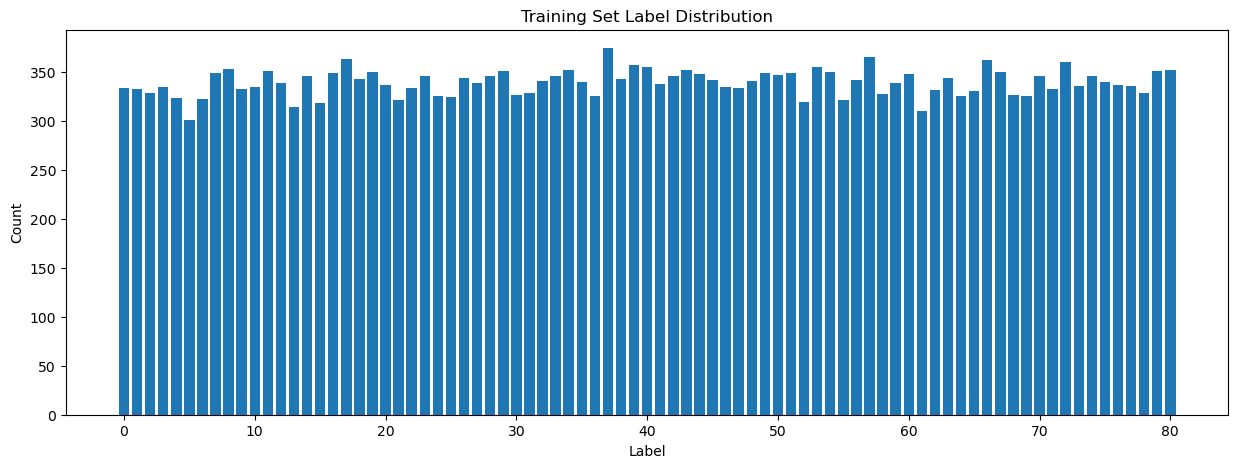

In [40]:
#Bar chart for the training set
plt.figure(figsize=(15, 5))
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Training Set Label Distribution')
plt.show()

### Validation Set data Distribution:

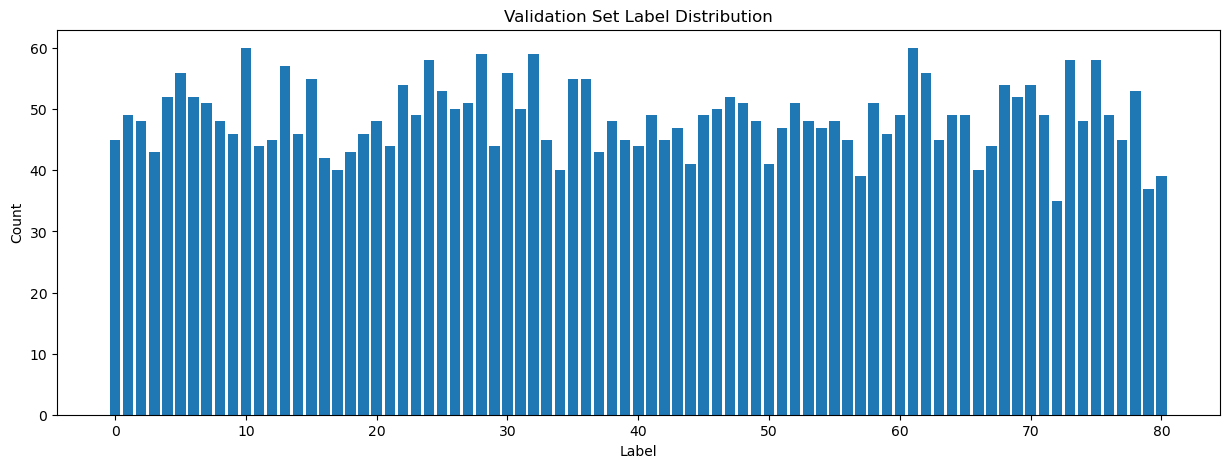

In [41]:

validation_class_counts = Counter()

for _, labels in val_data:
    validation_class_counts.update(labels.numpy())

#bar chart for the validation set
plt.figure(figsize=(15, 5))
plt.bar(validation_class_counts.keys(), validation_class_counts.values())
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Validation Set Label Distribution')
plt.show()



### Test Set Data Distribution

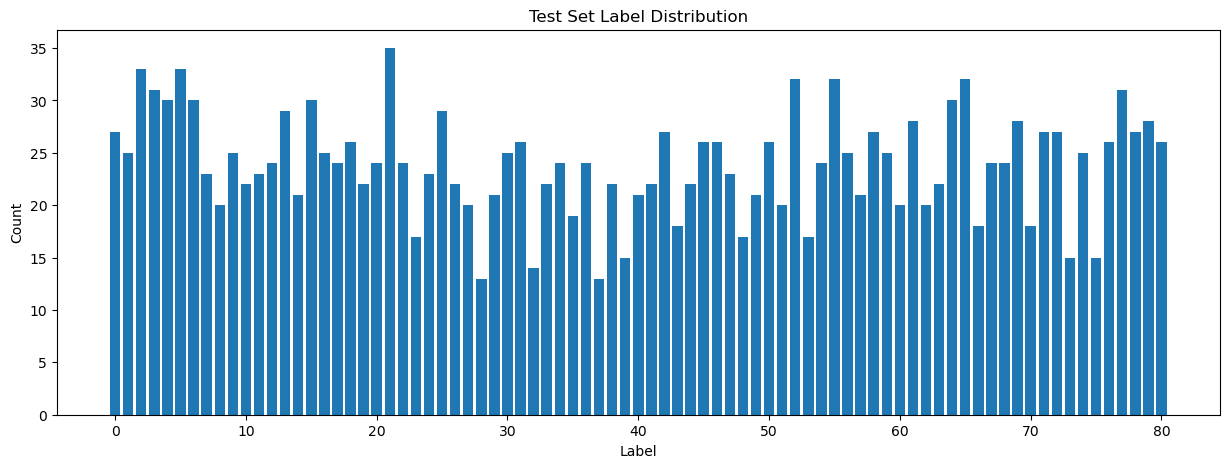

In [42]:
test_class_counter = Counter()

for _, labels in test_data:
    test_class_counter.update(labels.numpy())

#bar chart for the test set
plt.figure(figsize=(15, 5))
plt.bar(test_class_counter.keys(), test_class_counter.values())
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Test Set Label Distribution')
plt.show()

### Training the Network

In [14]:
#import the relative layers
from tensorflow.keras.models import Sequential# used for the model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

In [18]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(MaxPooling2D((2, 2)))#reduce dimentions of the input

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))#reduce dimentions of the input

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))#reduce dimentions of the input

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))#reduce dimentions of the input

#Flatten results:
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))#fully connected layers
model.add(Dense(81, activation='softmax'))#fully connected layers and output



In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 64)       

In [59]:
history = model.fit(train_data, epochs=25, validation_data=val_data)

Epoch 1/25
858/858 [==============================] - 709s 825ms/step - loss: 4.1362 - accuracy: 0.0502 - val_loss: 3.9120 - val_accuracy: 0.0912
Epoch 2/25
858/858 [==============================] - 705s 819ms/step - loss: 3.7175 - accuracy: 0.1210 - val_loss: 3.5993 - val_accuracy: 0.1466
Epoch 3/25
858/858 [==============================] - 735s 855ms/step - loss: 3.3917 - accuracy: 0.1849 - val_loss: 3.4287 - val_accuracy: 0.1966
Epoch 4/25
858/858 [==============================] - 713s 830ms/step - loss: 3.1162 - accuracy: 0.2414 - val_loss: 3.3754 - val_accuracy: 0.2116
Epoch 5/25
858/858 [==============================] - ETA: 0s - loss: 2.8787 - accuracy: 0.2879

KeyboardInterrupt: 

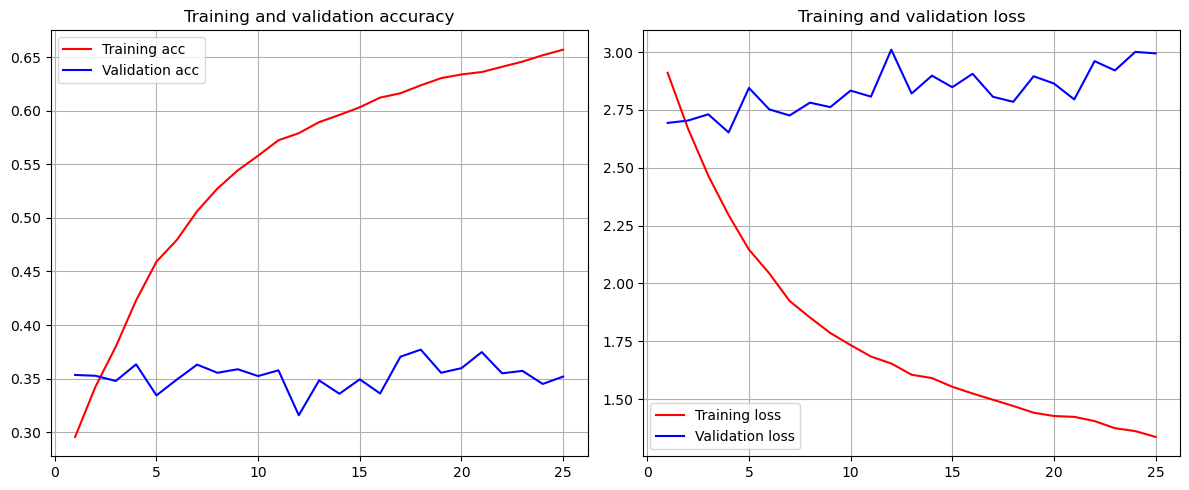

In [56]:
def visualize(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].grid(True)
    axs[0].legend()
    
    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].grid(True)
    axs[1].legend()
    
    plt.tight_layout()
    plt.show()
visualize(history)

## Loading and Saving Weights:

In [32]:
model.save_weights('model_impl_one.h5')# To save the weights of the model

In [26]:
model.load_weights('model_impl_one.h5')# To load the weights of the model

### Retraining the Model form loaded Weights:

In [28]:
history = model.fit(train_data, epochs=25, validation_data=val_data)

Epoch 1/25
858/858 [==============================] - 602s 700ms/step - loss: 2.9107 - accuracy: 0.2956 - val_loss: 2.6939 - val_accuracy: 0.3534
Epoch 2/25
858/858 [==============================] - 675s 785ms/step - loss: 2.6698 - accuracy: 0.3424 - val_loss: 2.7039 - val_accuracy: 0.3526
Epoch 3/25
858/858 [==============================] - 691s 804ms/step - loss: 2.4659 - accuracy: 0.3798 - val_loss: 2.7309 - val_accuracy: 0.3478
Epoch 4/25
858/858 [==============================] - 693s 806ms/step - loss: 2.2954 - accuracy: 0.4230 - val_loss: 2.6527 - val_accuracy: 0.3633
Epoch 5/25
858/858 [==============================] - 694s 807ms/step - loss: 2.1464 - accuracy: 0.4591 - val_loss: 2.8450 - val_accuracy: 0.3343
Epoch 6/25
858/858 [==============================] - 665s 773ms/step - loss: 2.0437 - accuracy: 0.4793 - val_loss: 2.7523 - val_accuracy: 0.3491
Epoch 7/25
858/858 [==============================] - 660s 768ms/step - loss: 1.9244 - accuracy: 0.5062 - val_loss: 2.7260 -

In [30]:
test_results = model.evaluate(test_data)

# Print the test accuracy and loss
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

61/61 [==============================] - 66s 177ms/step - loss: 3.0008 - accuracy: 0.3235
Test Loss: 3.000786066055298
Test Accuracy: 0.3235294222831726


## Model's Performance for each Animal:

In [54]:
for images, true_labels in test_data:
    # Get model predictions for the batch
    predictions_probabilities = model.predict(images)
    
    #Convert probabilities to class predictions
    predicted_classes = np.argmax(predictions_probabilities, axis=1)
    
    for i in range(len(true_labels)):
        true_label = class_names[true_labels[i]] # Convert true label index to class name
        predicted_class = class_names[predicted_classes[i]] # Convert predicted class index to class name
        prediction_prob = predictions_probabilities[i, predicted_classes[i]] # Probability of the predicted class
        
        print(f"Example {i + 1}:")
        print(f"Actual Label: {true_label}")
        print(f"Predicted Label: {predicted_class}")
        print(f"Prediction Probability: {prediction_prob * 100:.2f}%")
        print("=" * 40)


1/1 [==============================] - 0s 247ms/step
Example 1:
Actual Label: wombat
Predicted Label: panda
Prediction Probability: 29.73%
Example 2:
Actual Label: sheep
Predicted Label: penguin
Prediction Probability: 30.50%
Example 3:
Actual Label: lobster
Predicted Label: ladybugs
Prediction Probability: 21.23%
Example 4:
Actual Label: fly
Predicted Label: hornbill
Prediction Probability: 11.23%
Example 5:
Actual Label: seahorse
Predicted Label: seahorse
Prediction Probability: 73.69%
Example 6:
Actual Label: owl
Predicted Label: jellyfish
Prediction Probability: 40.64%
Example 7:
Actual Label: raccoon
Predicted Label: raccoon
Prediction Probability: 68.12%
Example 8:
Actual Label: mosquito
Predicted Label: seahorse
Prediction Probability: 40.74%
Example 9:
Actual Label: mouse
Predicted Label: porcupine
Prediction Probability: 9.27%
Example 10:
Actual Label: starfish
Predicted Label: leopard
Prediction Probability: 18.03%
Example 11:
Actual Label: jellyfish
Predicted Label: swan
Pre

1/1 [==============================] - 0s 149ms/step
Example 1:
Actual Label: moth
Predicted Label: moth
Prediction Probability: 99.79%
Example 2:
Actual Label: caterpillar
Predicted Label: caterpillar
Prediction Probability: 14.08%
Example 3:
Actual Label: eagle
Predicted Label: eagle
Prediction Probability: 31.03%
Example 4:
Actual Label: okapi
Predicted Label: owl
Prediction Probability: 24.86%
Example 5:
Actual Label: cat
Predicted Label: goat
Prediction Probability: 31.49%
Example 6:
Actual Label: dolphin
Predicted Label: whale
Prediction Probability: 43.90%
Example 7:
Actual Label: hornbill
Predicted Label: penguin
Prediction Probability: 21.03%
Example 8:
Actual Label: hedgehog
Predicted Label: hedgehog
Prediction Probability: 94.65%
Example 9:
Actual Label: leopard
Predicted Label: leopard
Prediction Probability: 54.82%
Example 10:
Actual Label: koala
Predicted Label: elephant
Prediction Probability: 19.37%
Example 11:
Actual Label: eagle
Predicted Label: elephant
Prediction Pr

1/1 [==============================] - 0s 147ms/step
Example 1:
Actual Label: zebra
Predicted Label: zebra
Prediction Probability: 99.58%
Example 2:
Actual Label: pigeon
Predicted Label: whale
Prediction Probability: 31.50%
Example 3:
Actual Label: sheep
Predicted Label: squirrel
Prediction Probability: 46.78%
Example 4:
Actual Label: otter
Predicted Label: sparrow
Prediction Probability: 11.60%
Example 5:
Actual Label: mouse
Predicted Label: mouse
Prediction Probability: 67.11%
Example 6:
Actual Label: seal
Predicted Label: cat
Prediction Probability: 30.79%
Example 7:
Actual Label: pelecaniformes
Predicted Label: zebra
Prediction Probability: 37.63%
Example 8:
Actual Label: sandpiper
Predicted Label: sandpiper
Prediction Probability: 33.36%
Example 9:
Actual Label: hare
Predicted Label: duck
Prediction Probability: 40.66%
Example 10:
Actual Label: eagle
Predicted Label: crow
Prediction Probability: 7.50%
Example 11:
Actual Label: ox
Predicted Label: crab
Prediction Probability: 77.90

1/1 [==============================] - 0s 147ms/step
Example 1:
Actual Label: possum
Predicted Label: possum
Prediction Probability: 61.54%
Example 2:
Actual Label: owl
Predicted Label: cat
Prediction Probability: 14.18%
Example 3:
Actual Label: sheep
Predicted Label: sheep
Prediction Probability: 16.31%
Example 4:
Actual Label: flamingo
Predicted Label: hummingbird
Prediction Probability: 50.11%
Example 5:
Actual Label: rhinoceros
Predicted Label: rhinoceros
Prediction Probability: 9.46%
Example 6:
Actual Label: koala
Predicted Label: coyote
Prediction Probability: 16.44%
Example 7:
Actual Label: hornbill
Predicted Label: snake
Prediction Probability: 28.27%
Example 8:
Actual Label: orangutan
Predicted Label: cow
Prediction Probability: 8.23%
Example 9:
Actual Label: cockroach
Predicted Label: hornbill
Prediction Probability: 19.09%
Example 10:
Actual Label: woodpecker
Predicted Label: woodpecker
Prediction Probability: 97.57%
Example 11:
Actual Label: leopard
Predicted Label: porcupi

1/1 [==============================] - 0s 150ms/step
Example 1:
Actual Label: penguin
Predicted Label: penguin
Prediction Probability: 62.55%
Example 2:
Actual Label: lizard
Predicted Label: grasshopper
Prediction Probability: 78.71%
Example 3:
Actual Label: cow
Predicted Label: orangutan
Prediction Probability: 18.19%
Example 4:
Actual Label: pigeon
Predicted Label: pigeon
Prediction Probability: 91.95%
Example 5:
Actual Label: pelecaniformes
Predicted Label: eagle
Prediction Probability: 72.30%
Example 6:
Actual Label: jellyfish
Predicted Label: seal
Prediction Probability: 20.09%
Example 7:
Actual Label: raccoon
Predicted Label: turtle
Prediction Probability: 20.06%
Example 8:
Actual Label: flamingo
Predicted Label: pigeon
Prediction Probability: 73.65%
Example 9:
Actual Label: raccoon
Predicted Label: turtle
Prediction Probability: 8.68%
Example 10:
Actual Label: tiger
Predicted Label: tiger
Prediction Probability: 99.67%
Example 11:
Actual Label: deer
Predicted Label: kangaroo
Pre

1/1 [==============================] - 0s 135ms/step
Example 1:
Actual Label: dolphin
Predicted Label: cow
Prediction Probability: 6.25%
Example 2:
Actual Label: duck
Predicted Label: squid
Prediction Probability: 19.02%
Example 3:
Actual Label: duck
Predicted Label: hornbill
Prediction Probability: 32.79%
Example 4:
Actual Label: squid
Predicted Label: shark
Prediction Probability: 53.20%
Example 5:
Actual Label: ox
Predicted Label: turkey
Prediction Probability: 14.18%
Example 6:
Actual Label: moth
Predicted Label: oyster
Prediction Probability: 12.99%
Example 7:
Actual Label: otter
Predicted Label: wombat
Prediction Probability: 59.12%
Example 8:
Actual Label: chimpanzee
Predicted Label: hornbill
Prediction Probability: 76.65%
Example 9:
Actual Label: octopus
Predicted Label: dolphin
Prediction Probability: 74.50%
Example 10:
Actual Label: reindeer
Predicted Label: hornbill
Prediction Probability: 21.15%
Example 11:
Actual Label: hummingbird
Predicted Label: pelecaniformes
Predictio

1/1 [==============================] - 0s 147ms/step
Example 1:
Actual Label: whale
Predicted Label: parrot
Prediction Probability: 11.52%
Example 2:
Actual Label: hyena
Predicted Label: fox
Prediction Probability: 34.65%
Example 3:
Actual Label: turkey
Predicted Label: ladybugs
Prediction Probability: 24.55%
Example 4:
Actual Label: elephant
Predicted Label: flamingo
Prediction Probability: 47.58%
Example 5:
Actual Label: wolf
Predicted Label: tiger
Prediction Probability: 40.27%
Example 6:
Actual Label: caterpillar
Predicted Label: sparrow
Prediction Probability: 43.00%
Example 7:
Actual Label: sandpiper
Predicted Label: sandpiper
Prediction Probability: 91.19%
Example 8:
Actual Label: otter
Predicted Label: penguin
Prediction Probability: 15.40%
Example 9:
Actual Label: jellyfish
Predicted Label: caterpillar
Prediction Probability: 21.70%
Example 10:
Actual Label: crow
Predicted Label: crow
Prediction Probability: 80.68%
Example 11:
Actual Label: ox
Predicted Label: ox
Prediction Pr

1/1 [==============================] - 0s 149ms/step
Example 1:
Actual Label: goose
Predicted Label: sheep
Prediction Probability: 15.64%
Example 2:
Actual Label: starfish
Predicted Label: dragonfly
Prediction Probability: 20.72%
Example 3:
Actual Label: starfish
Predicted Label: starfish
Prediction Probability: 91.64%
Example 4:
Actual Label: crow
Predicted Label: crow
Prediction Probability: 56.56%
Example 5:
Actual Label: eagle
Predicted Label: penguin
Prediction Probability: 31.60%
Example 6:
Actual Label: hornbill
Predicted Label: hornbill
Prediction Probability: 38.22%
Example 7:
Actual Label: hedgehog
Predicted Label: hedgehog
Prediction Probability: 73.67%
Example 8:
Actual Label: owl
Predicted Label: tiger
Prediction Probability: 44.88%
Example 9:
Actual Label: flamingo
Predicted Label: mouse
Prediction Probability: 28.34%
Example 10:
Actual Label: owl
Predicted Label: lion
Prediction Probability: 8.57%
Example 11:
Actual Label: seal
Predicted Label: sandpiper
Prediction Proba

1/1 [==============================] - 0s 163ms/step
Example 1:
Actual Label: hamster
Predicted Label: mouse
Prediction Probability: 23.27%
Example 2:
Actual Label: donkey
Predicted Label: donkey
Prediction Probability: 22.76%
Example 3:
Actual Label: goat
Predicted Label: rhinoceros
Prediction Probability: 25.58%
Example 4:
Actual Label: horse
Predicted Label: cow
Prediction Probability: 20.54%
Example 5:
Actual Label: panda
Predicted Label: panda
Prediction Probability: 81.53%
Example 6:
Actual Label: starfish
Predicted Label: kangaroo
Prediction Probability: 6.20%
Example 7:
Actual Label: mouse
Predicted Label: mouse
Prediction Probability: 24.96%
Example 8:
Actual Label: mouse
Predicted Label: orangutan
Prediction Probability: 23.39%
Example 9:
Actual Label: raccoon
Predicted Label: wolf
Prediction Probability: 15.70%
Example 10:
Actual Label: whale
Predicted Label: whale
Prediction Probability: 93.39%
Example 11:
Actual Label: deer
Predicted Label: pelecaniformes
Prediction Probab

1/1 [==============================] - 0s 150ms/step
Example 1:
Actual Label: seahorse
Predicted Label: parrot
Prediction Probability: 35.80%
Example 2:
Actual Label: hedgehog
Predicted Label: zebra
Prediction Probability: 65.48%
Example 3:
Actual Label: tiger
Predicted Label: leopard
Prediction Probability: 99.70%
Example 4:
Actual Label: sparrow
Predicted Label: pelecaniformes
Prediction Probability: 9.61%
Example 5:
Actual Label: cockroach
Predicted Label: ladybugs
Prediction Probability: 49.62%
Example 6:
Actual Label: otter
Predicted Label: sandpiper
Prediction Probability: 17.67%
Example 7:
Actual Label: owl
Predicted Label: starfish
Prediction Probability: 22.62%
Example 8:
Actual Label: seahorse
Predicted Label: cockroach
Prediction Probability: 22.58%
Example 9:
Actual Label: lion
Predicted Label: goat
Prediction Probability: 29.92%
Example 10:
Actual Label: cow
Predicted Label: penguin
Prediction Probability: 17.61%
Example 11:
Actual Label: woodpecker
Predicted Label: woodpe

1/1 [==============================] - 0s 167ms/step
Example 1:
Actual Label: possum
Predicted Label: possum
Prediction Probability: 59.22%
Example 2:
Actual Label: pigeon
Predicted Label: mouse
Prediction Probability: 18.13%
Example 3:
Actual Label: jellyfish
Predicted Label: jellyfish
Prediction Probability: 94.30%
Example 4:
Actual Label: dolphin
Predicted Label: otter
Prediction Probability: 8.06%
Example 5:
Actual Label: hare
Predicted Label: hedgehog
Prediction Probability: 64.51%
Example 6:
Actual Label: snake
Predicted Label: zebra
Prediction Probability: 28.86%
Example 7:
Actual Label: sparrow
Predicted Label: orangutan
Prediction Probability: 18.47%
Example 8:
Actual Label: goldfish
Predicted Label: goldfish
Prediction Probability: 96.21%
Example 9:
Actual Label: leopard
Predicted Label: leopard
Prediction Probability: 72.89%
Example 10:
Actual Label: elephant
Predicted Label: elephant
Prediction Probability: 65.40%
Example 11:
Actual Label: pig
Predicted Label: oyster
Predic

1/1 [==============================] - 0s 136ms/step
Example 1:
Actual Label: dog
Predicted Label: horse
Prediction Probability: 26.71%
Example 2:
Actual Label: grasshopper
Predicted Label: zebra
Prediction Probability: 27.40%
Example 3:
Actual Label: mosquito
Predicted Label: duck
Prediction Probability: 17.30%
Example 4:
Actual Label: duck
Predicted Label: otter
Prediction Probability: 16.34%
Example 5:
Actual Label: dog
Predicted Label: panda
Prediction Probability: 43.63%
Example 6:
Actual Label: pig
Predicted Label: penguin
Prediction Probability: 18.11%
Example 7:
Actual Label: hyena
Predicted Label: snake
Prediction Probability: 48.84%
Example 8:
Actual Label: fox
Predicted Label: fox
Prediction Probability: 91.16%
Example 9:
Actual Label: crow
Predicted Label: penguin
Prediction Probability: 16.69%
Example 10:
Actual Label: shark
Predicted Label: whale
Prediction Probability: 58.28%
Example 11:
Actual Label: gorilla
Predicted Label: leopard
Prediction Probability: 8.55%
Example

1/1 [==============================] - 0s 140ms/step
Example 1:
Actual Label: raccoon
Predicted Label: flamingo
Prediction Probability: 20.55%
Example 2:
Actual Label: goldfish
Predicted Label: cow
Prediction Probability: 29.45%
Example 3:
Actual Label: orangutan
Predicted Label: koala
Prediction Probability: 64.06%
Example 4:
Actual Label: woodpecker
Predicted Label: woodpecker
Prediction Probability: 87.17%
Example 5:
Actual Label: dog
Predicted Label: chimpanzee
Prediction Probability: 22.34%
Example 6:
Actual Label: tiger
Predicted Label: owl
Prediction Probability: 28.68%
Example 7:
Actual Label: mosquito
Predicted Label: cockroach
Prediction Probability: 17.85%
Example 8:
Actual Label: parrot
Predicted Label: hamster
Prediction Probability: 84.73%
Example 9:
Actual Label: hippopotamus
Predicted Label: hippopotamus
Prediction Probability: 8.58%
Example 10:
Actual Label: coyote
Predicted Label: coyote
Prediction Probability: 38.95%
Example 11:
Actual Label: fox
Predicted Label: sta

1/1 [==============================] - 0s 142ms/step
Example 1:
Actual Label: pelecaniformes
Predicted Label: pigeon
Prediction Probability: 18.03%
Example 2:
Actual Label: lizard
Predicted Label: fox
Prediction Probability: 11.22%
Example 3:
Actual Label: turkey
Predicted Label: sheep
Prediction Probability: 43.45%
Example 4:
Actual Label: donkey
Predicted Label: donkey
Prediction Probability: 72.99%
Example 5:
Actual Label: hyena
Predicted Label: ox
Prediction Probability: 13.63%
Example 6:
Actual Label: coyote
Predicted Label: tiger
Prediction Probability: 25.94%
Example 7:
Actual Label: cow
Predicted Label: ox
Prediction Probability: 20.27%
Example 8:
Actual Label: sparrow
Predicted Label: sparrow
Prediction Probability: 74.70%
Example 9:
Actual Label: tiger
Predicted Label: tiger
Prediction Probability: 99.58%
Example 10:
Actual Label: zebra
Predicted Label: zebra
Prediction Probability: 81.37%
Example 11:
Actual Label: hornbill
Predicted Label: okapi
Prediction Probability: 30.92

1/1 [==============================] - 0s 134ms/step
Example 1:
Actual Label: cockroach
Predicted Label: snake
Prediction Probability: 73.99%
Example 2:
Actual Label: swan
Predicted Label: mouse
Prediction Probability: 19.10%
Example 3:
Actual Label: snake
Predicted Label: penguin
Prediction Probability: 45.26%
Example 4:
Actual Label: lion
Predicted Label: kangaroo
Prediction Probability: 12.54%
Example 5:
Actual Label: starfish
Predicted Label: penguin
Prediction Probability: 16.53%
Example 6:
Actual Label: wombat
Predicted Label: cat
Prediction Probability: 22.42%
Example 7:
Actual Label: penguin
Predicted Label: penguin
Prediction Probability: 68.80%
Example 8:
Actual Label: goat
Predicted Label: cow
Prediction Probability: 23.24%
Example 9:
Actual Label: duck
Predicted Label: duck
Prediction Probability: 69.92%
Example 10:
Actual Label: turkey
Predicted Label: leopard
Prediction Probability: 88.48%
Example 11:
Actual Label: lobster
Predicted Label: leopard
Prediction Probability: 

1/1 [==============================] - 0s 152ms/step
Example 1:
Actual Label: kangaroo
Predicted Label: sparrow
Prediction Probability: 44.11%
Example 2:
Actual Label: koala
Predicted Label: wombat
Prediction Probability: 28.90%
Example 3:
Actual Label: swan
Predicted Label: possum
Prediction Probability: 71.83%
Example 4:
Actual Label: woodpecker
Predicted Label: zebra
Prediction Probability: 43.39%
Example 5:
Actual Label: jellyfish
Predicted Label: mouse
Prediction Probability: 64.24%
Example 6:
Actual Label: lizard
Predicted Label: leopard
Prediction Probability: 25.10%
Example 7:
Actual Label: duck
Predicted Label: reindeer
Prediction Probability: 20.21%
Example 8:
Actual Label: goldfish
Predicted Label: goldfish
Prediction Probability: 77.17%
Example 9:
Actual Label: koala
Predicted Label: koala
Prediction Probability: 48.69%
Example 10:
Actual Label: lizard
Predicted Label: elephant
Prediction Probability: 30.41%
Example 11:
Actual Label: chimpanzee
Predicted Label: chimpanzee
P

1/1 [==============================] - 0s 186ms/step
Example 1:
Actual Label: seahorse
Predicted Label: caterpillar
Prediction Probability: 62.99%
Example 2:
Actual Label: grasshopper
Predicted Label: ladybugs
Prediction Probability: 32.00%
Example 3:
Actual Label: raccoon
Predicted Label: raccoon
Prediction Probability: 87.70%
Example 4:
Actual Label: cow
Predicted Label: raccoon
Prediction Probability: 24.17%
Example 5:
Actual Label: hummingbird
Predicted Label: duck
Prediction Probability: 26.93%
Example 6:
Actual Label: seahorse
Predicted Label: seahorse
Prediction Probability: 35.36%
Example 7:
Actual Label: pelecaniformes
Predicted Label: penguin
Prediction Probability: 47.28%
Example 8:
Actual Label: octopus
Predicted Label: leopard
Prediction Probability: 28.30%
Example 9:
Actual Label: otter
Predicted Label: hyena
Prediction Probability: 21.99%
Example 10:
Actual Label: jellyfish
Predicted Label: jellyfish
Prediction Probability: 60.23%
Example 11:
Actual Label: shark
Predicte

1/1 [==============================] - 0s 204ms/step
Example 1:
Actual Label: orangutan
Predicted Label: orangutan
Prediction Probability: 82.02%
Example 2:
Actual Label: starfish
Predicted Label: lobster
Prediction Probability: 61.04%
Example 3:
Actual Label: fox
Predicted Label: fox
Prediction Probability: 37.92%
Example 4:
Actual Label: hippopotamus
Predicted Label: penguin
Prediction Probability: 12.73%
Example 5:
Actual Label: flamingo
Predicted Label: sparrow
Prediction Probability: 50.58%
Example 6:
Actual Label: fox
Predicted Label: fox
Prediction Probability: 93.24%
Example 7:
Actual Label: koala
Predicted Label: leopard
Prediction Probability: 19.60%
Example 8:
Actual Label: starfish
Predicted Label: zebra
Prediction Probability: 28.68%
Example 9:
Actual Label: dog
Predicted Label: koala
Prediction Probability: 34.24%
Example 10:
Actual Label: pelecaniformes
Predicted Label: swan
Prediction Probability: 46.63%
Example 11:
Actual Label: woodpecker
Predicted Label: woodpecker
P

1/1 [==============================] - 0s 184ms/step
Example 1:
Actual Label: shark
Predicted Label: whale
Prediction Probability: 61.29%
Example 2:
Actual Label: chimpanzee
Predicted Label: turkey
Prediction Probability: 56.39%
Example 3:
Actual Label: hamster
Predicted Label: hamster
Prediction Probability: 39.39%
Example 4:
Actual Label: cockroach
Predicted Label: parrot
Prediction Probability: 22.56%
Example 5:
Actual Label: flamingo
Predicted Label: flamingo
Prediction Probability: 94.91%
Example 6:
Actual Label: dragonfly
Predicted Label: dragonfly
Prediction Probability: 35.90%
Example 7:
Actual Label: ladybugs
Predicted Label: ladybugs
Prediction Probability: 65.69%
Example 8:
Actual Label: elephant
Predicted Label: elephant
Prediction Probability: 14.01%
Example 9:
Actual Label: mouse
Predicted Label: penguin
Prediction Probability: 63.14%
Example 10:
Actual Label: pigeon
Predicted Label: lizard
Prediction Probability: 52.48%
Example 11:
Actual Label: ladybugs
Predicted Label:

1/1 [==============================] - 0s 180ms/step
Example 1:
Actual Label: grasshopper
Predicted Label: grasshopper
Prediction Probability: 22.51%
Example 2:
Actual Label: squid
Predicted Label: goldfish
Prediction Probability: 60.41%
Example 3:
Actual Label: tiger
Predicted Label: tiger
Prediction Probability: 74.18%
Example 4:
Actual Label: hare
Predicted Label: wolf
Prediction Probability: 25.79%
Example 5:
Actual Label: okapi
Predicted Label: okapi
Prediction Probability: 76.31%
Example 6:
Actual Label: dog
Predicted Label: chimpanzee
Prediction Probability: 42.61%
Example 7:
Actual Label: sparrow
Predicted Label: sandpiper
Prediction Probability: 17.69%
Example 8:
Actual Label: orangutan
Predicted Label: orangutan
Prediction Probability: 97.33%
Example 9:
Actual Label: cockroach
Predicted Label: fox
Prediction Probability: 31.87%
Example 10:
Actual Label: goat
Predicted Label: kangaroo
Prediction Probability: 37.83%
Example 11:
Actual Label: pelecaniformes
Predicted Label: swan

1/1 [==============================] - 0s 207ms/step
Example 1:
Actual Label: seal
Predicted Label: okapi
Prediction Probability: 13.17%
Example 2:
Actual Label: koala
Predicted Label: koala
Prediction Probability: 11.17%
Example 3:
Actual Label: woodpecker
Predicted Label: parrot
Prediction Probability: 13.88%
Example 4:
Actual Label: rat
Predicted Label: eagle
Prediction Probability: 31.34%
Example 5:
Actual Label: wombat
Predicted Label: zebra
Prediction Probability: 31.51%
Example 6:
Actual Label: parrot
Predicted Label: parrot
Prediction Probability: 21.32%
Example 7:
Actual Label: cockroach
Predicted Label: cat
Prediction Probability: 9.61%
Example 8:
Actual Label: ox
Predicted Label: goose
Prediction Probability: 46.11%
Example 9:
Actual Label: hamster
Predicted Label: hamster
Prediction Probability: 86.19%
Example 10:
Actual Label: fox
Predicted Label: fox
Prediction Probability: 92.59%
Example 11:
Actual Label: whale
Predicted Label: dolphin
Prediction Probability: 36.29%
Exam

1/1 [==============================] - 0s 157ms/step
Example 1:
Actual Label: elephant
Predicted Label: elephant
Prediction Probability: 32.50%
Example 2:
Actual Label: fly
Predicted Label: lobster
Prediction Probability: 24.28%
Example 3:
Actual Label: tiger
Predicted Label: leopard
Prediction Probability: 91.20%
Example 4:
Actual Label: orangutan
Predicted Label: panda
Prediction Probability: 37.28%
Example 5:
Actual Label: wolf
Predicted Label: wolf
Prediction Probability: 74.80%
Example 6:
Actual Label: deer
Predicted Label: lion
Prediction Probability: 33.23%
Example 7:
Actual Label: pelecaniformes
Predicted Label: seahorse
Prediction Probability: 26.99%
Example 8:
Actual Label: flamingo
Predicted Label: dog
Prediction Probability: 13.73%
Example 9:
Actual Label: whale
Predicted Label: eagle
Prediction Probability: 55.17%
Example 10:
Actual Label: hyena
Predicted Label: hyena
Prediction Probability: 45.26%
Example 11:
Actual Label: cockroach
Predicted Label: eagle
Prediction Proba

1/1 [==============================] - 0s 150ms/step
Example 1:
Actual Label: owl
Predicted Label: tiger
Prediction Probability: 8.56%
Example 2:
Actual Label: horse
Predicted Label: orangutan
Prediction Probability: 34.06%
Example 3:
Actual Label: flamingo
Predicted Label: grasshopper
Prediction Probability: 26.89%
Example 4:
Actual Label: dolphin
Predicted Label: shark
Prediction Probability: 34.14%
Example 5:
Actual Label: fly
Predicted Label: fly
Prediction Probability: 52.35%
Example 6:
Actual Label: fly
Predicted Label: elephant
Prediction Probability: 16.22%
Example 7:
Actual Label: oyster
Predicted Label: leopard
Prediction Probability: 38.81%
Example 8:
Actual Label: reindeer
Predicted Label: reindeer
Prediction Probability: 75.74%
Example 9:
Actual Label: flamingo
Predicted Label: flamingo
Prediction Probability: 11.94%
Example 10:
Actual Label: ladybugs
Predicted Label: shark
Prediction Probability: 45.84%
Example 11:
Actual Label: fox
Predicted Label: hamster
Prediction Pro

1/1 [==============================] - 0s 158ms/step
Example 1:
Actual Label: mouse
Predicted Label: mouse
Prediction Probability: 16.57%
Example 2:
Actual Label: crab
Predicted Label: ox
Prediction Probability: 35.44%
Example 3:
Actual Label: coyote
Predicted Label: kangaroo
Prediction Probability: 33.78%
Example 4:
Actual Label: coyote
Predicted Label: sandpiper
Prediction Probability: 49.74%
Example 5:
Actual Label: mosquito
Predicted Label: mosquito
Prediction Probability: 99.76%
Example 6:
Actual Label: goose
Predicted Label: swan
Prediction Probability: 12.32%
Example 7:
Actual Label: tiger
Predicted Label: tiger
Prediction Probability: 36.57%
Example 8:
Actual Label: lion
Predicted Label: lion
Prediction Probability: 99.03%
Example 9:
Actual Label: rat
Predicted Label: crow
Prediction Probability: 32.79%
Example 10:
Actual Label: hedgehog
Predicted Label: hedgehog
Prediction Probability: 81.07%
Example 11:
Actual Label: shark
Predicted Label: pelecaniformes
Prediction Probabilit

1/1 [==============================] - 0s 134ms/step
Example 1:
Actual Label: chimpanzee
Predicted Label: chimpanzee
Prediction Probability: 69.24%
Example 2:
Actual Label: okapi
Predicted Label: hyena
Prediction Probability: 17.61%
Example 3:
Actual Label: seal
Predicted Label: donkey
Prediction Probability: 20.59%
Example 4:
Actual Label: fly
Predicted Label: turkey
Prediction Probability: 27.03%
Example 5:
Actual Label: kangaroo
Predicted Label: moth
Prediction Probability: 33.04%
Example 6:
Actual Label: hippopotamus
Predicted Label: hippopotamus
Prediction Probability: 24.68%
Example 7:
Actual Label: hedgehog
Predicted Label: porcupine
Prediction Probability: 93.78%
Example 8:
Actual Label: moth
Predicted Label: moth
Prediction Probability: 26.95%
Example 9:
Actual Label: kangaroo
Predicted Label: leopard
Prediction Probability: 43.29%
Example 10:
Actual Label: seal
Predicted Label: raccoon
Prediction Probability: 54.26%
Example 11:
Actual Label: sheep
Predicted Label: kangaroo
Pr

1/1 [==============================] - 0s 143ms/step
Example 1:
Actual Label: dragonfly
Predicted Label: hummingbird
Prediction Probability: 35.75%
Example 2:
Actual Label: cockroach
Predicted Label: lobster
Prediction Probability: 36.32%
Example 3:
Actual Label: reindeer
Predicted Label: moth
Prediction Probability: 49.77%
Example 4:
Actual Label: duck
Predicted Label: pelecaniformes
Prediction Probability: 28.04%
Example 5:
Actual Label: coyote
Predicted Label: squid
Prediction Probability: 24.48%
Example 6:
Actual Label: pelecaniformes
Predicted Label: pelecaniformes
Prediction Probability: 24.16%
Example 7:
Actual Label: hippopotamus
Predicted Label: reindeer
Prediction Probability: 5.98%
Example 8:
Actual Label: cockroach
Predicted Label: cockroach
Prediction Probability: 34.47%
Example 9:
Actual Label: rhinoceros
Predicted Label: elephant
Prediction Probability: 36.17%
Example 10:
Actual Label: shark
Predicted Label: whale
Prediction Probability: 69.93%
Example 11:
Actual Label: 

1/1 [==============================] - 0s 156ms/step
Example 1:
Actual Label: swan
Predicted Label: crow
Prediction Probability: 43.18%
Example 2:
Actual Label: goose
Predicted Label: parrot
Prediction Probability: 23.10%
Example 3:
Actual Label: squid
Predicted Label: dolphin
Prediction Probability: 11.98%
Example 4:
Actual Label: grasshopper
Predicted Label: sparrow
Prediction Probability: 33.04%
Example 5:
Actual Label: porcupine
Predicted Label: porcupine
Prediction Probability: 86.39%
Example 6:
Actual Label: whale
Predicted Label: jellyfish
Prediction Probability: 27.65%
Example 7:
Actual Label: kangaroo
Predicted Label: kangaroo
Prediction Probability: 78.15%
Example 8:
Actual Label: rhinoceros
Predicted Label: gorilla
Prediction Probability: 50.11%
Example 9:
Actual Label: chimpanzee
Predicted Label: hornbill
Prediction Probability: 50.17%
Example 10:
Actual Label: turkey
Predicted Label: turkey
Prediction Probability: 10.80%
Example 11:
Actual Label: possum
Predicted Label: sp

1/1 [==============================] - 0s 149ms/step
Example 1:
Actual Label: lion
Predicted Label: penguin
Prediction Probability: 36.09%
Example 2:
Actual Label: hummingbird
Predicted Label: hummingbird
Prediction Probability: 19.53%
Example 3:
Actual Label: owl
Predicted Label: zebra
Prediction Probability: 27.44%
Example 4:
Actual Label: wombat
Predicted Label: elephant
Prediction Probability: 22.62%
Example 5:
Actual Label: mosquito
Predicted Label: flamingo
Prediction Probability: 24.70%
Example 6:
Actual Label: deer
Predicted Label: moth
Prediction Probability: 71.99%
Example 7:
Actual Label: starfish
Predicted Label: horse
Prediction Probability: 34.05%
Example 8:
Actual Label: raccoon
Predicted Label: oyster
Prediction Probability: 36.88%
Example 9:
Actual Label: hedgehog
Predicted Label: kangaroo
Prediction Probability: 18.95%
Example 10:
Actual Label: cockroach
Predicted Label: turkey
Prediction Probability: 17.75%
Example 11:
Actual Label: hedgehog
Predicted Label: porcupin

1/1 [==============================] - 0s 131ms/step
Example 1:
Actual Label: horse
Predicted Label: horse
Prediction Probability: 14.91%
Example 2:
Actual Label: crab
Predicted Label: hedgehog
Prediction Probability: 45.08%
Example 3:
Actual Label: pelecaniformes
Predicted Label: lizard
Prediction Probability: 18.69%
Example 4:
Actual Label: eagle
Predicted Label: eagle
Prediction Probability: 22.67%
Example 5:
Actual Label: rat
Predicted Label: tiger
Prediction Probability: 24.88%
Example 6:
Actual Label: shark
Predicted Label: shark
Prediction Probability: 61.08%
Example 7:
Actual Label: cockroach
Predicted Label: horse
Prediction Probability: 42.64%
Example 8:
Actual Label: sandpiper
Predicted Label: sandpiper
Prediction Probability: 50.36%
Example 9:
Actual Label: pigeon
Predicted Label: dolphin
Prediction Probability: 30.44%
Example 10:
Actual Label: wolf
Predicted Label: hyena
Prediction Probability: 27.47%
Example 11:
Actual Label: moth
Predicted Label: orangutan
Prediction Pro

1/1 [==============================] - 0s 132ms/step
Example 1:
Actual Label: cat
Predicted Label: cat
Prediction Probability: 36.95%
Example 2:
Actual Label: possum
Predicted Label: possum
Prediction Probability: 76.46%
Example 3:
Actual Label: caterpillar
Predicted Label: sparrow
Prediction Probability: 16.49%
Example 4:
Actual Label: octopus
Predicted Label: crab
Prediction Probability: 19.67%
Example 5:
Actual Label: kangaroo
Predicted Label: lion
Prediction Probability: 15.27%
Example 6:
Actual Label: koala
Predicted Label: koala
Prediction Probability: 13.32%
Example 7:
Actual Label: shark
Predicted Label: snake
Prediction Probability: 16.19%
Example 8:
Actual Label: sparrow
Predicted Label: tiger
Prediction Probability: 69.09%
Example 9:
Actual Label: zebra
Predicted Label: zebra
Prediction Probability: 98.35%
Example 10:
Actual Label: lobster
Predicted Label: snake
Prediction Probability: 49.21%
Example 11:
Actual Label: panda
Predicted Label: panda
Prediction Probability: 67.9

1/1 [==============================] - 0s 163ms/step
Example 1:
Actual Label: pelecaniformes
Predicted Label: goat
Prediction Probability: 5.68%
Example 2:
Actual Label: pig
Predicted Label: dragonfly
Prediction Probability: 27.52%
Example 3:
Actual Label: caterpillar
Predicted Label: caterpillar
Prediction Probability: 31.45%
Example 4:
Actual Label: whale
Predicted Label: shark
Prediction Probability: 55.53%
Example 5:
Actual Label: donkey
Predicted Label: elephant
Prediction Probability: 16.86%
Example 6:
Actual Label: grasshopper
Predicted Label: grasshopper
Prediction Probability: 29.74%
Example 7:
Actual Label: gorilla
Predicted Label: gorilla
Prediction Probability: 67.48%
Example 8:
Actual Label: ladybugs
Predicted Label: fly
Prediction Probability: 58.86%
Example 9:
Actual Label: tiger
Predicted Label: duck
Prediction Probability: 61.28%
Example 10:
Actual Label: flamingo
Predicted Label: flamingo
Prediction Probability: 24.38%
Example 11:
Actual Label: coyote
Predicted Label:

### 2nd Model Training:

In [14]:
m_two = Sequential()

m_two.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
m_two.add(MaxPooling2D((2, 2)))#reduce dimentions of the input

m_two.add(Conv2D(32, (3, 3), activation='relu'))
m_two.add(BatchNormalization())#batch normalisation added
m_two.add(MaxPooling2D((2, 2)))#reduce dimentions of the input

m_two.add(Conv2D(64, (3, 3), activation='relu'))
m_two.add(BatchNormalization())#batch normalisation added
m_two.add(MaxPooling2D((2, 2)))#reduce dimentions of the input

m_two.add(Conv2D(64, (3, 3), activation='relu'))
m_two.add(BatchNormalization())#batch normalisation added
m_two.add(MaxPooling2D((2, 2)))#reduce dimentions of the input

m_two.add(Conv2D(128, (3, 3), activation='relu'))
m_two.add(BatchNormalization())#batch normalisation added
m_two.add(MaxPooling2D((2, 2)))#reduce dimentions of the input

#Flatten results:
m_two.add(Flatten())
m_two.add(Dropout(0.5))
m_two.add(Dense(512, activation='relu'))#fully connected layers
m_two.add(BatchNormalization())#batch normalisation added
m_two.add(Dense(81, activation='softmax'))#fully connected layers and output

In [15]:
m_two.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])#compile the model

In [16]:
m_two_history = m_two.fit(train_data, epochs=18, validation_data=val_data)

Epoch 1/18
858/858 [==============================] - 603s 700ms/step - loss: 4.1096 - accuracy: 0.0890 - val_loss: 4.4502 - val_accuracy: 0.0864
Epoch 2/18
858/858 [==============================] - 633s 737ms/step - loss: 3.5373 - accuracy: 0.1631 - val_loss: 3.6018 - val_accuracy: 0.1621
Epoch 3/18
858/858 [==============================] - 674s 785ms/step - loss: 3.2611 - accuracy: 0.2103 - val_loss: 3.3916 - val_accuracy: 0.2027
Epoch 4/18
858/858 [==============================] - 681s 793ms/step - loss: 3.0482 - accuracy: 0.2485 - val_loss: 3.7733 - val_accuracy: 0.1494
Epoch 5/18
858/858 [==============================] - 690s 803ms/step - loss: 2.8816 - accuracy: 0.2804 - val_loss: 3.5876 - val_accuracy: 0.1987
Epoch 6/18
858/858 [==============================] - 698s 812ms/step - loss: 2.7410 - accuracy: 0.3132 - val_loss: 4.0394 - val_accuracy: 0.1601
Epoch 7/18
858/858 [==============================] - 703s 818ms/step - loss: 2.6069 - accuracy: 0.3443 - val_loss: 2.9596 -

In [ ]:
m_two.save_weights('model_two_weights.h5')# To save the weights of the model

## 3rd Model Training

In [15]:
m_three = Sequential()

m_three.add(Conv2D(16, (3, 3), activation='relu', input_shape=(180, 180, 3)))
m_three.add(MaxPooling2D((2, 2)))#reduce dimentions of the input

m_three.add(Conv2D(16, (3, 3), activation='relu'))
m_three.add(BatchNormalization())#batch normalisation added
m_three.add(MaxPooling2D((2, 2)))#reduce dimentions of the input

m_three.add(Conv2D(32, (3, 3), activation='relu'))
m_three.add(BatchNormalization())#batch normalisation added
m_three.add(MaxPooling2D((2, 2)))#reduce dimentions of the input

m_three.add(Conv2D(32, (3, 3), activation='relu'))
m_three.add(BatchNormalization())#batch normalisation added
m_three.add(MaxPooling2D((2, 2)))#reduce dimentions of the input

#Flatten results:
m_three.add(Flatten())
m_three.add(Dropout(0.5))
m_three.add(Dense(128, activation='relu'))#fully connected layers
m_three.add(BatchNormalization())#batch normalisation added
m_three.add(Dense(81, activation='softmax'))#fully connected layers and output

In [16]:
m_three.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])#compile the model

In [17]:
m_three_history = m_three.fit(train_data, epochs=18, validation_data=val_data)

Epoch 1/18
858/858 [==============================] - 568s 655ms/step - loss: 3.9417 - accuracy: 0.0975 - val_loss: 4.6582 - val_accuracy: 0.0673
Epoch 2/18
858/858 [==============================] - 5499s 6s/step - loss: 3.4535 - accuracy: 0.1768 - val_loss: 3.7703 - val_accuracy: 0.1512
Epoch 3/18
858/858 [==============================] - 401s 466ms/step - loss: 3.2277 - accuracy: 0.2222 - val_loss: 3.8209 - val_accuracy: 0.1819
Epoch 4/18
858/858 [==============================] - 458s 533ms/step - loss: 3.0665 - accuracy: 0.2551 - val_loss: 3.6225 - val_accuracy: 0.1860
Epoch 5/18
858/858 [==============================] - 549s 638ms/step - loss: 2.9418 - accuracy: 0.2788 - val_loss: 3.7024 - val_accuracy: 0.1890
Epoch 6/18
858/858 [==============================] - 512s 595ms/step - loss: 2.8380 - accuracy: 0.2990 - val_loss: 3.2252 - val_accuracy: 0.2569
Epoch 7/18
858/858 [==============================] - 513s 596ms/step - loss: 2.7455 - accuracy: 0.3144 - val_loss: 3.0627 - v